In [747]:
import os
import numpy as np
import pandas as pd
import plotnine as p9
import plotly.plotly as py
import plotly.graph_objs as go 

from pandas.api.types import CategoricalDtype
from pandas.plotting import scatter_matrix

In [3]:
import geopandas as gpd
import matplotlib.pyplot as plt

In [368]:
from ipywidgets import widgets, interactive


In [18]:
# Read in data from three sources
# Source 1: Nightlight Paper 
data = pd.read_excel('nightlight.xlsx')
print('The shape of the nightlight data is',data.shape)
list(data)

The shape of the nightlight data is (5405, 12)


['Code',
 'Region',
 'Year',
 'Area Lit (Log, km2)',
 'Electricity Consumption (Log, Billion kWh)',
 'CO2 Emissions (Log, metric tonnes)',
 'Gross Domestic Product (Log, Billion (Nominal) Current US$)',
 'Population (Log)',
 'N2O Emissions (Log, kt of CO2 equivalent)',
 'CH4 Emissions (Log, kt of CO2 equivalent)',
 'HFC, PFC and SF6 Emissions (Log, kt of CO2 equivalent)',
 'Poverty Headcount Ratio (at national poverty lines)']

In [27]:
# Change col names 
data.columns = ['Code','Region','Year','Area Lit','Electricity Consumption','CO2 Emissions',
 'GDP','Population','N2O Emissions','CH4 Emissions','Fluoride Emissions','Poverty Headcount Ratio']

In [49]:
# Value counts of Year
data['Year'].value_counts()

2011    246
2007    246
1996    246
2000    246
2004    246
2008    246
2012    246
1993    246
1997    246
2001    246
2005    246
2009    246
2013    246
1994    246
1998    246
2006    246
2010    246
1995    246
1999    246
2003    246
1992    246
2002    239
Name: Year, dtype: int64

In [28]:
# Source 2: World admin map shapefile
shapefile = 'ne_10m_admin_0_countries.shp'
gdf = gpd.read_file(shapefile)[['ADM0_A3', 'geometry']].to_crs('+proj=robin')
nl_map_merged = gdf.merge(data, left_on='ADM0_A3', right_on='Code')
print('Shapefile has {} rows;'.format(gdf.shape[0]))
print('The shape of merged nightlight-Map data is',nl_map_merged.shape)

Shapefile has 255 rows;
The shape of merged nightlight-Map data is (5098, 14)


In [149]:
countrydf = pd.read_csv('Country.csv')

In [153]:
gdf2 = gpd.read_file(shapefile).to_crs('+proj=robin')

In [29]:
# Source 3: World Bank Country Indicators
countrydf = pd.read_csv('Country.csv')
countrydf.shape >= data['Region'].unique().shape
country = countrydf.drop(columns = ['ShortName','TableName','LongName','Alpha2Code','CurrencyUnit','SpecialNotes'])
c_names = country.columns.tolist()
c_names[c_names.index('Region')] = 'Continent'
country.columns = c_names
all_merged = nl_map_merged.merge(country, left_on='Code', right_on = 'CountryCode' )
print('Country data has {} rows.'.format(country.shape[0]))
print('The shape of nightlight-map-country data is',all_merged.shape)
all_merged.head()

Country data has 247 rows.
The shape of nightlight-map-country data is (4460, 39)


ADM0_A3                                           geometry Code     Region  \
0     IDN  (POLYGON ((11108970.26020776 445285.1302330397...  IDN  Indonesia   
1     IDN  (POLYGON ((11108970.26020776 445285.1302330397...  IDN  Indonesia   
2     IDN  (POLYGON ((11108970.26020776 445285.1302330397...  IDN  Indonesia   
3     IDN  (POLYGON ((11108970.26020776 445285.1302330397...  IDN  Indonesia   
4     IDN  (POLYGON ((11108970.26020776 445285.1302330397...  IDN  Indonesia   

   Year  Area Lit  Electricity Consumption  CO2 Emissions       GDP  \
0  2013  9.551737                 5.211580      19.987973  6.766590   
1  2012  9.622070                 5.120900      20.211673  6.776187   
2  2011  9.322483                 5.055170      20.150537  6.740439   
3  2010  9.469328                 4.977307      19.895402  6.564125   
4  2009  8.985433                 4.893862      19.931636  6.290791   

   Population            ...              GovernmentAccountingConcept  \
0   19.342032            ...             Budgetary central government   
1   19.329092            ...             Budgetary central government   
2   19.315986            ...             Budgetary central government   
3   19.302848            ...             Budgetary central government   
4   19.289734            ...             Budgetary central government   

                 ImfDataDisseminationStandard  LatestPopulationCensus  \
0  Special Data Dissemination Standard (SDDS)                    2010   
1  Special Data Dissemination Standard (SDDS)                    2010   
2  Special Data Dissemination Standard (SDDS)                    2010   
3  Special Data Dissemination Standard (SDDS)                    2010   
4  Special Data Dissemination Standard (SDDS)                    2010   

                       LatestHouseholdSurvey  \
0  Demographic and Health Survey (DHS), 2012   
1  Demographic and Health Survey (DHS), 2012   
2  Demographic and Health Survey (DHS), 2012   
3  Demographic and Health Survey (DHS), 2012   
4  Demographic and Health Survey (DHS), 2012   

  SourceOfMostRecentIncomeAndExpenditureData VitalRegistrationComplete  \
0    Integrated household survey (IHS), 2013                       NaN   
1    Integrated household survey (IHS), 2013                       NaN   
2    Integrated household survey (IHS), 2013                       NaN   
3    Integrated household survey (IHS), 2013                       NaN   
4    Integrated household survey (IHS), 2013                       NaN   

  LatestAgriculturalCensus LatestIndustrialData LatestTradeData  \
0                     2013               2011.0          2013.0   
1                     2013               2011.0          2013.0   
2                     2013               2011.0          2013.0   
3                     2013               2011.0          2013.0   
4                     2013               2011.0          2013.0   

  LatestWaterWithdrawalData  
0                    2000.0  
1                    2000.0  
2                    2000.0  
3                    2000.0  
4                    2000.0  

[5 rows x 39 columns]

In [30]:
# Correlation table 
corr = data.corr()['Area Lit'].drop(labels = 'Area Lit').abs()
corr_sorted = corr.sort_values(ascending = False)
corr_sorted

Electricity Consumption    0.929839
CO2 Emissions              0.928277
GDP                        0.912570
Population                 0.720005
CH4 Emissions              0.652776
N2O Emissions              0.602580
Poverty Headcount Ratio    0.418967
Fluoride Emissions         0.379041
Year                       0.097284
Name: Area Lit, dtype: float64

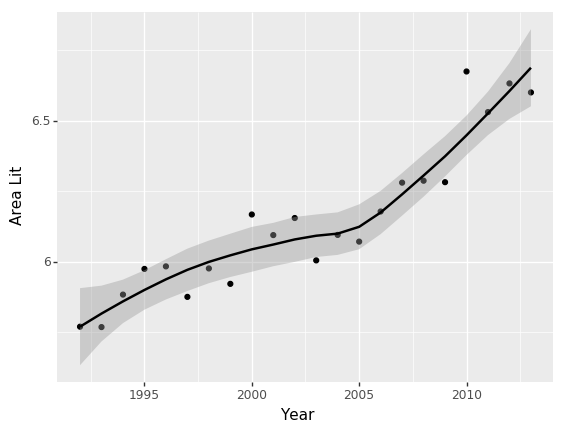

<ggplot: (7562246327)>

In [32]:
# Overall trend
arealt = data[['Year', 'Area Lit']].copy()
arealt_grouped = arealt.groupby(['Year']).mean().reset_index()
gg = p9.ggplot(arealt_grouped)
gg += p9.aes(x = 'Year', y = 'Area Lit' )
gg += p9.geom_point()
gg += p9.geom_smooth(method = 'loess')

gg

In [489]:
# Write a function of multiple maps 1992 - 2013 -- Final version
from ipywidgets import *
nl = data.copy()[['Code', 'Region','Year','Area Lit']]
vmin = np.floor(data['Area Lit'].describe()['min'])
vmax = np.ceil(data['Area Lit'].describe()['max'])

#shapefile = 'ne_10m_admin_0_countries.shp'
#gdf = gpd.read_file(shapefile)[['ADM0_A3', 'geometry']].to_crs('+proj=robin')
value = 'Area Lit'
colors = 6
cmap = 'Oranges'
figsize = (16, 10)
title = 'World Area Lit'

def nlmap(yr):
    nl_sub = nl.loc[nl['Year'] == yr]
    nl_sub = nl_sub.drop(columns = 'Year')
    nl_merged = gdf.merge(nl_sub, left_on='ADM0_A3', right_on='Code')
    ax = nl_merged.dropna().plot(column = value , cmap=cmap, figsize=figsize, vmin = vmin, vmax = vmax, k = colors, legend=True)
    nl_merged[nl_merged.isna().any(axis=1)].plot(ax=ax, color='#fafafa', hatch='///')
    
    ax.set_title(title, fontdict={'fontsize': 20}, loc='center')
    # ax.annotate(description, xy=(0.1, 0.1), size=12, xycoords='figure fraction')
    ax.set_axis_off()
    ax.set_xlim([-1.5e7, 1.7e7])
    ax.get_legend()
    ax.get_figure()

In [490]:
interact(nlmap, yr = (1992, 2013, 1))

interactive(children=(IntSlider(value=2002, description='yr', max=2013, min=1992), Output()), _dom_classes=('w…

<function __main__.nlmap(yr)>

In [668]:
data['Year'].unique()

array([2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003,
       2002, 2001, 2000, 1999, 1998, 1997, 1996, 1995, 1994, 1993, 1992])

1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012


/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



2013


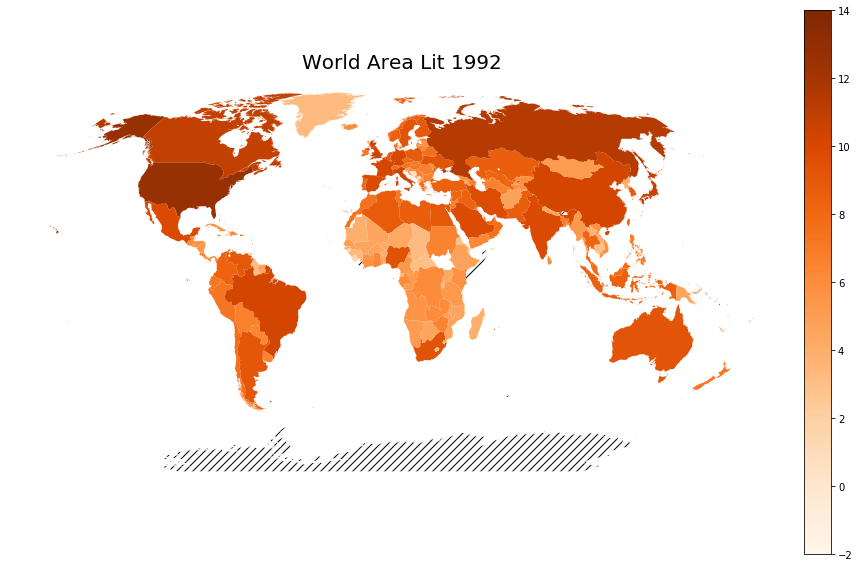

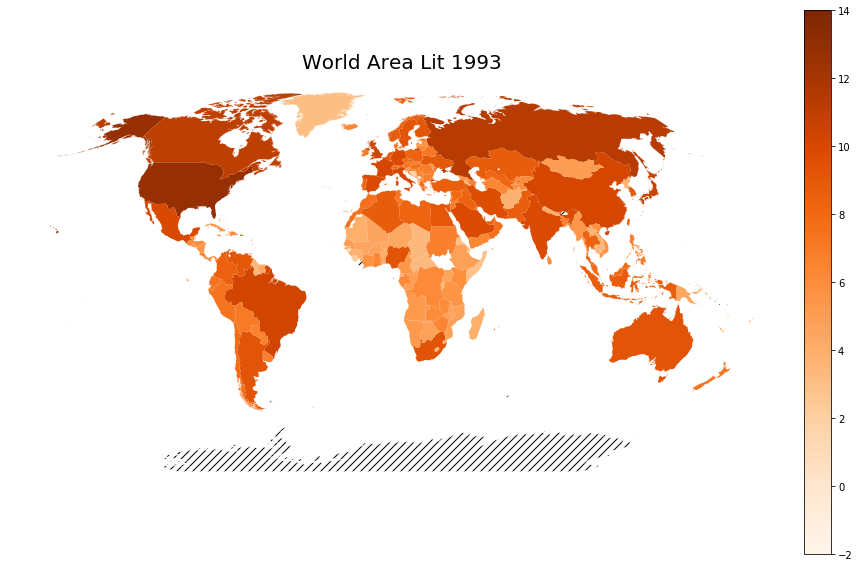

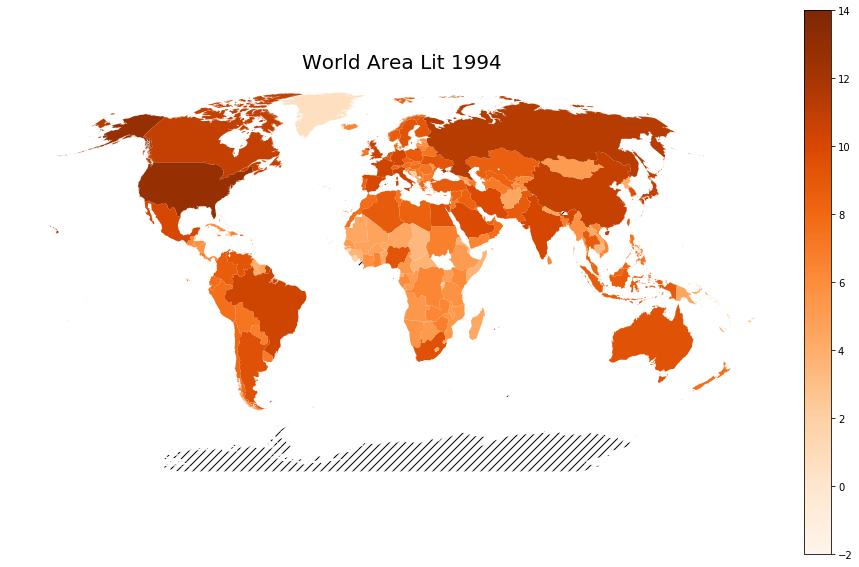

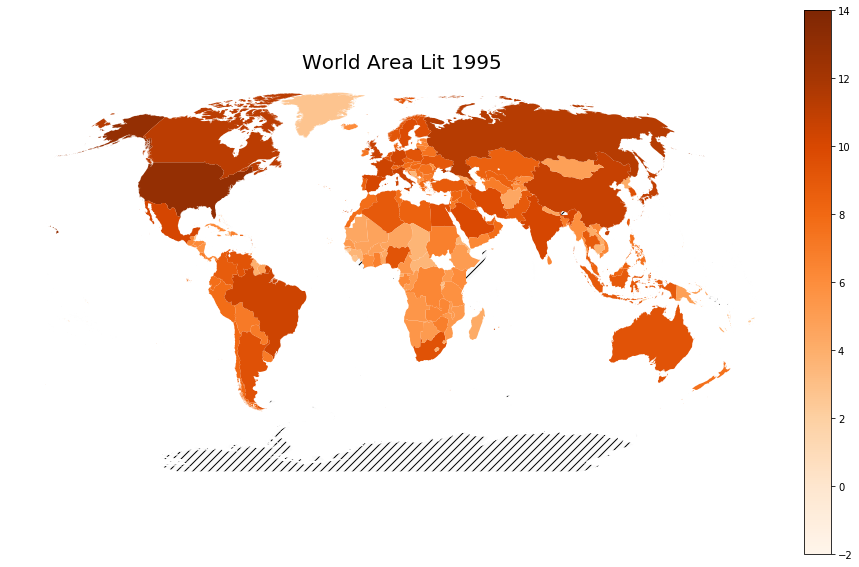

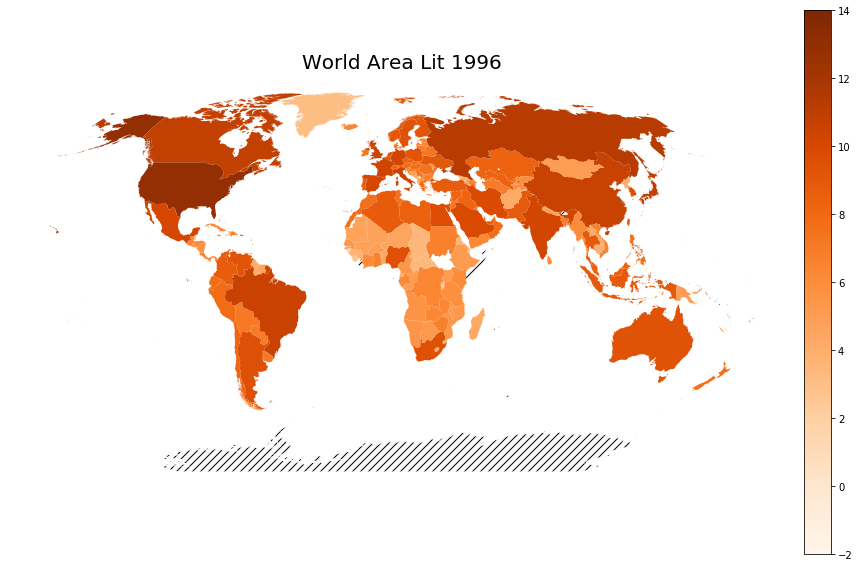

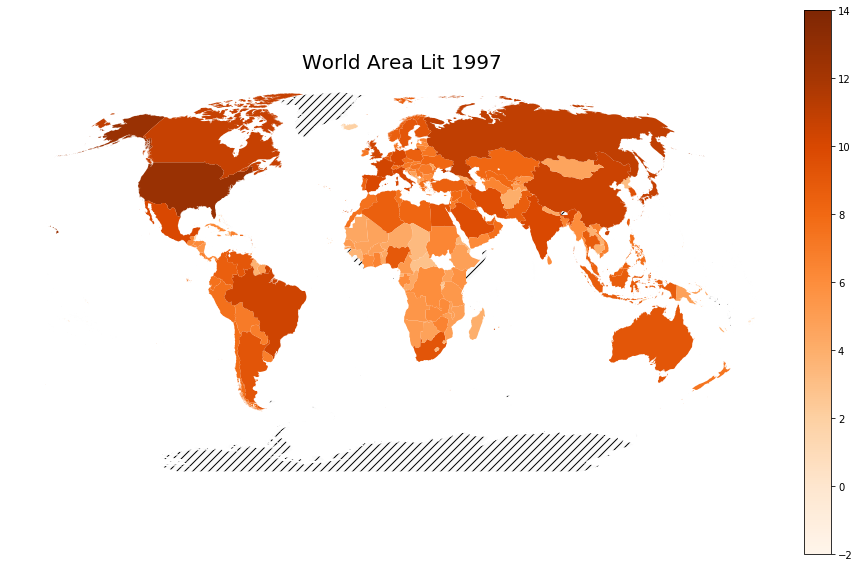

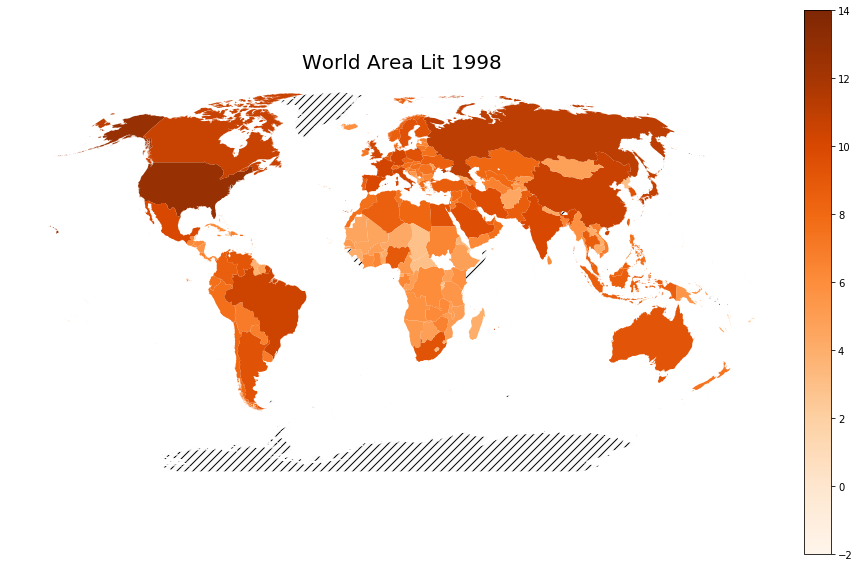

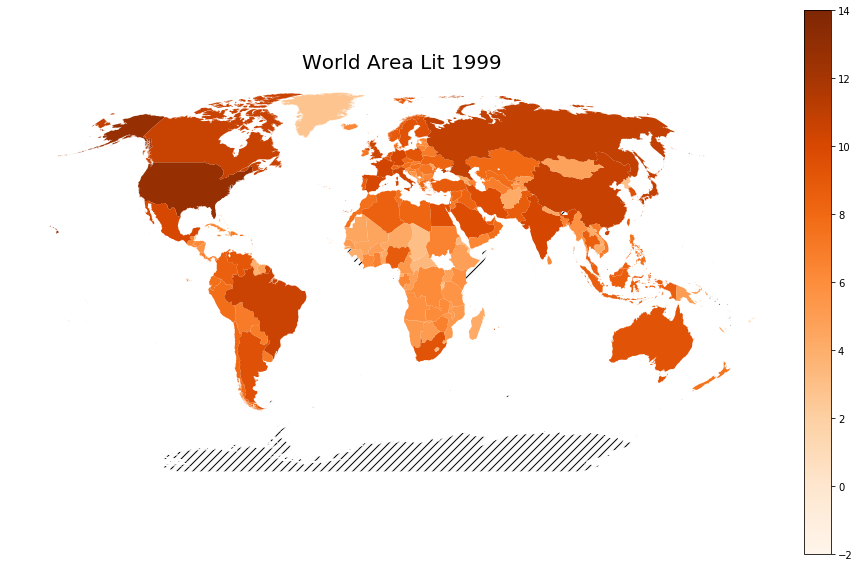

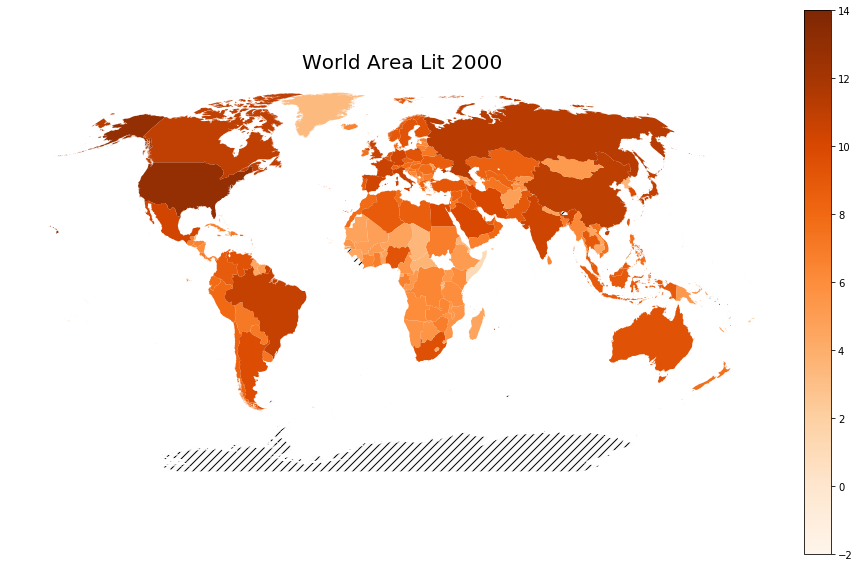

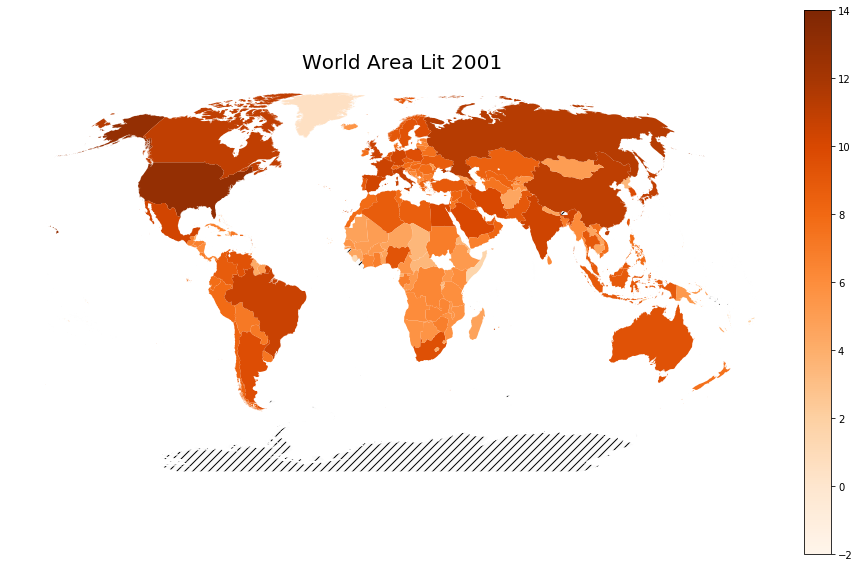

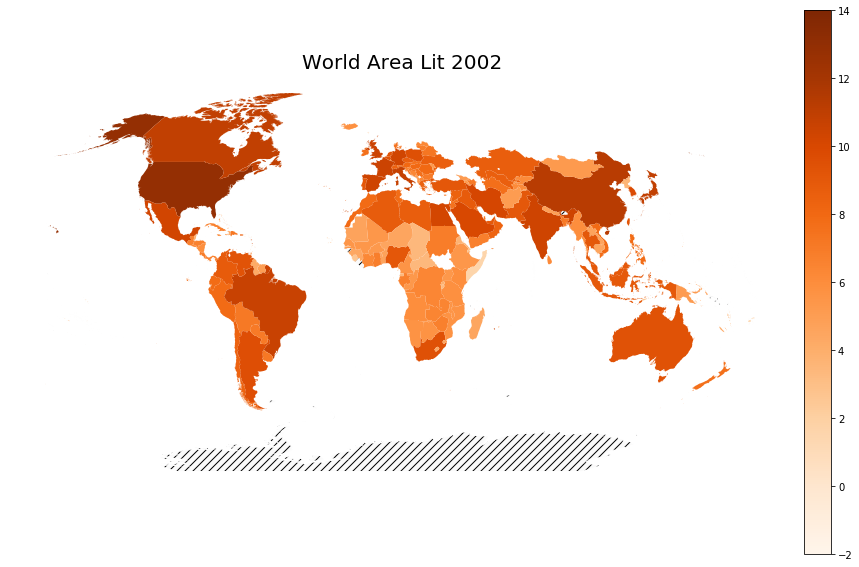

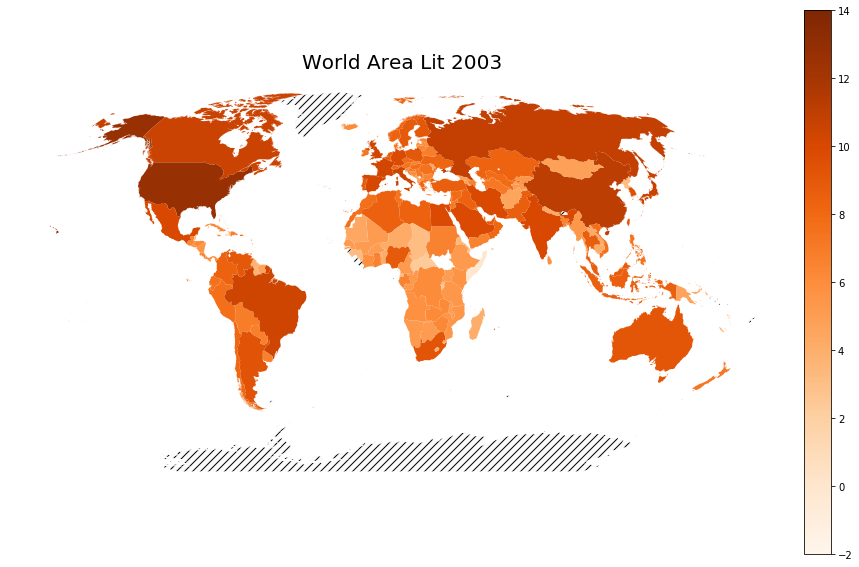

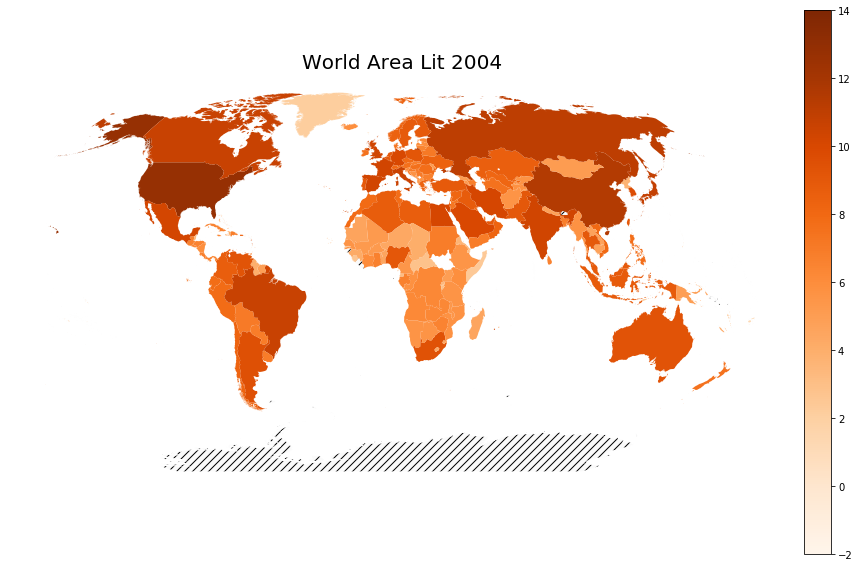

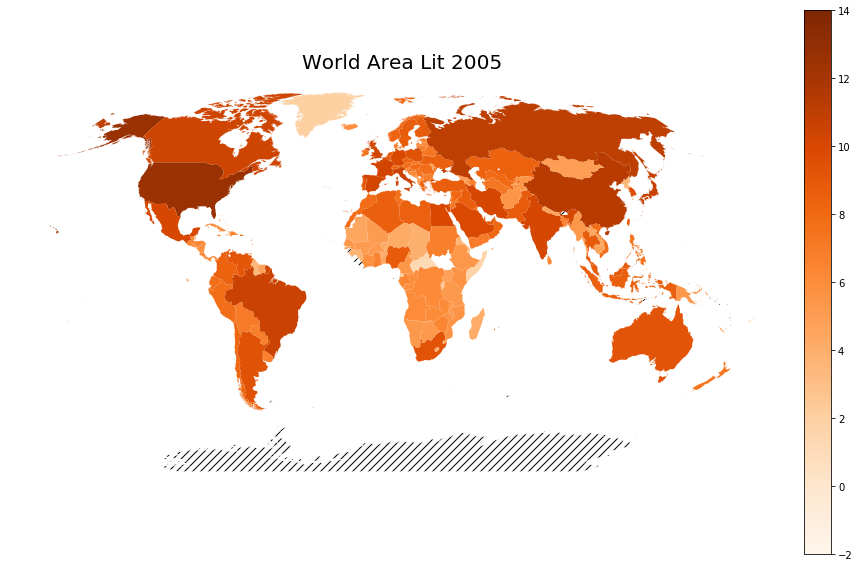

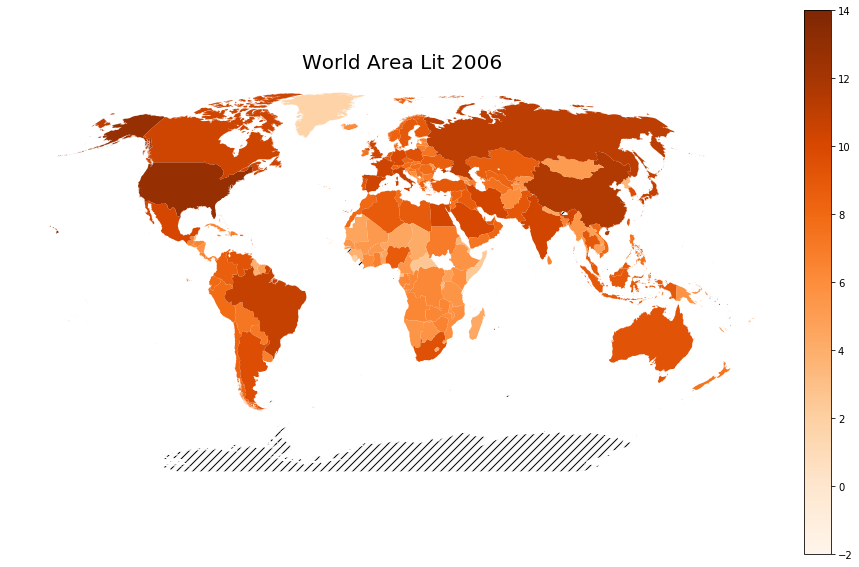

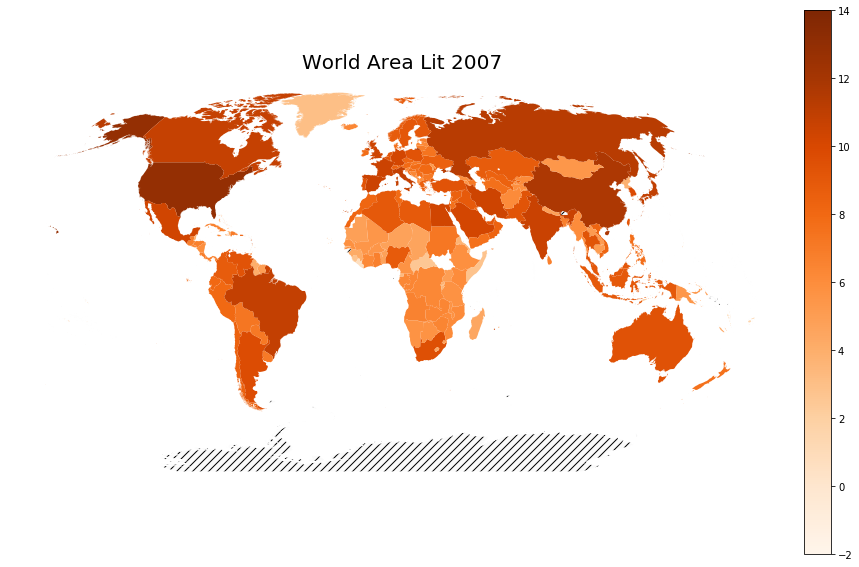

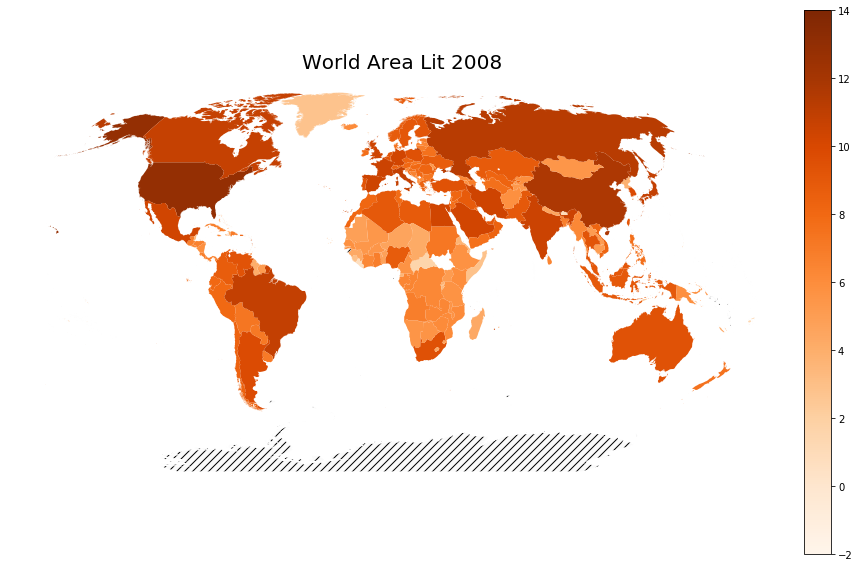

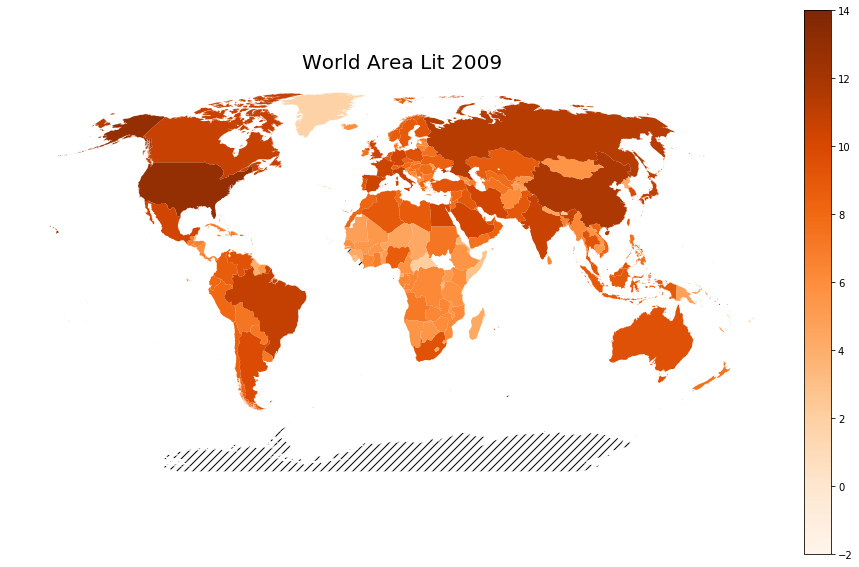

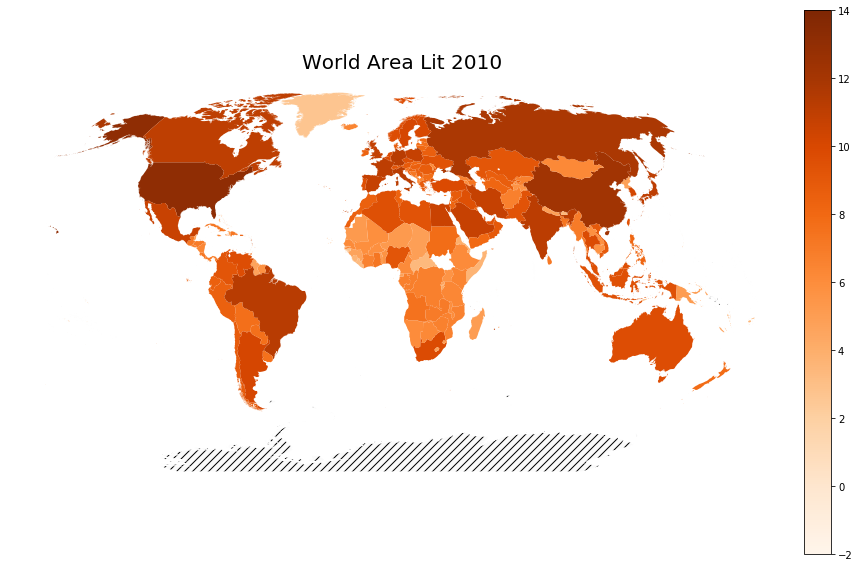

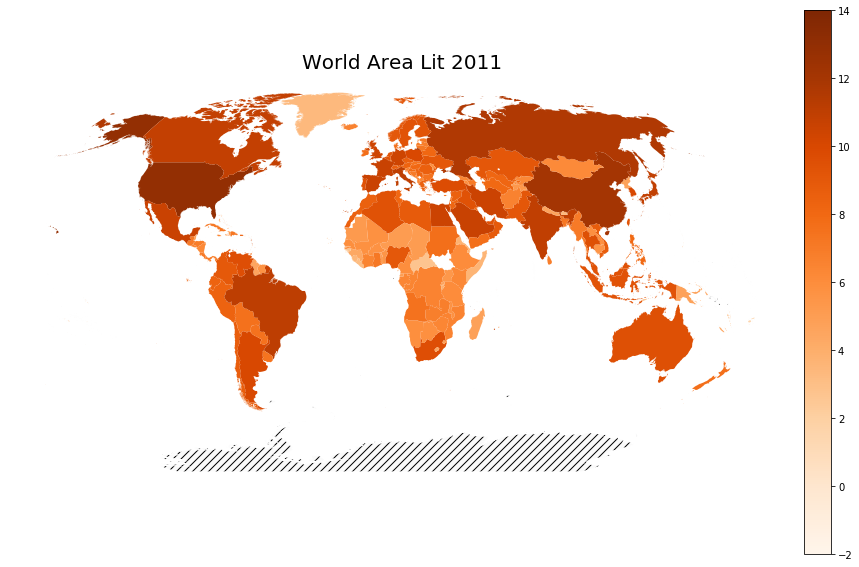

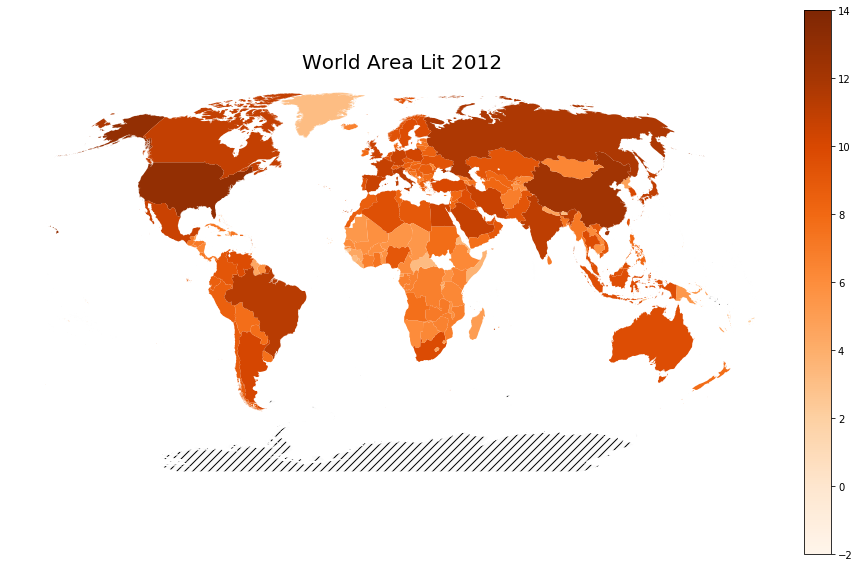

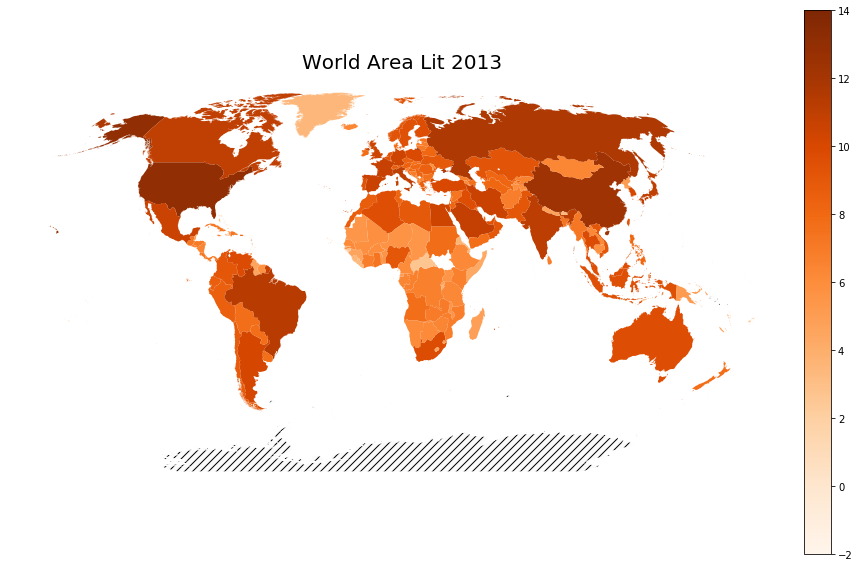

In [688]:
# For-loop to save multiple area lit maps 1992 - 2013 
from ipywidgets import *
nl = data.copy()[['Code', 'Region','Year','Area Lit']]
vmin = np.floor(data['Area Lit'].describe()['min'])
vmax = np.ceil(data['Area Lit'].describe()['max'])

#shapefile = 'ne_10m_admin_0_countries.shp'
#gdf = gpd.read_file(shapefile)[['ADM0_A3', 'geometry']].to_crs('+proj=robin')
value = 'Area Lit'
colors = 6
cmap = 'Oranges'
figsize = (16, 10)

for yr in list(range(1992, 2014)):
    print(yr)
    title = 'World Area Lit ' + str(yr)
    nl_sub = nl.loc[nl['Year'] == yr]
    nl_sub = nl_sub.drop(columns = 'Year')
    nl_merged = gdf.merge(nl_sub, left_on='ADM0_A3', right_on='Code')
    ax = nl_merged.dropna().plot(column = value , cmap=cmap, figsize=figsize, vmin = vmin, vmax = vmax, k = colors, legend=True)
    nl_merged[nl_merged.isna().any(axis=1)].plot(ax=ax, color='#fafafa', hatch='///')
    
    ax.set_title(title, fontdict={'fontsize': 20}, loc='center')
    # ax.annotate(description, xy=(0.1, 0.1), size=12, xycoords='figure fraction')
    ax.set_axis_off()
    ax.set_xlim([-1.5e7, 1.7e7])
    ax.get_legend()
    fig = ax.get_figure()
    figname = 'plot/alit_' + str(yr) + '.pdf'
    fig.savefig(figname, bbox_inches='tight')


In [769]:
gdp = data.copy()[['Code', 'Region','Year','GDP']]
vmin = np.floor(data['GDP'].describe()['min'])
vmax = np.ceil(data['GDP'].describe()['max'])

print(vmin, vmax)

gdp_merged.head()

-5.0 10.0


ADM0_A3                                           geometry Code     Region  \
0     IDN  (POLYGON ((11108970.26020776 445285.1302330397...  IDN  Indonesia   
1     MYS  (POLYGON ((11108970.26020776 445285.1302330397...  MYS   Malaysia   
2     CHL  (POLYGON ((-6477059.899247097 -1872360.8384665...  CHL      Chile   
3     BOL  POLYGON ((-6477059.899247097 -1872360.83846657...  BOL    Bolivia   
4     PER  (POLYGON ((-6477059.899247097 -1872360.8384665...  PER       Peru   

        GDP  
0  4.935310  
1  4.080105  
2  3.794769  
3  1.730569  
4  3.564189

1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012


/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



2013


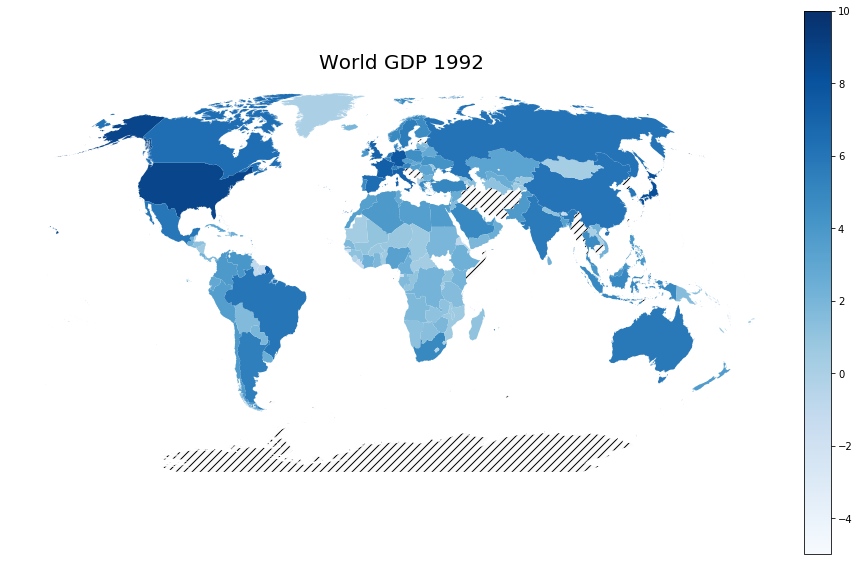

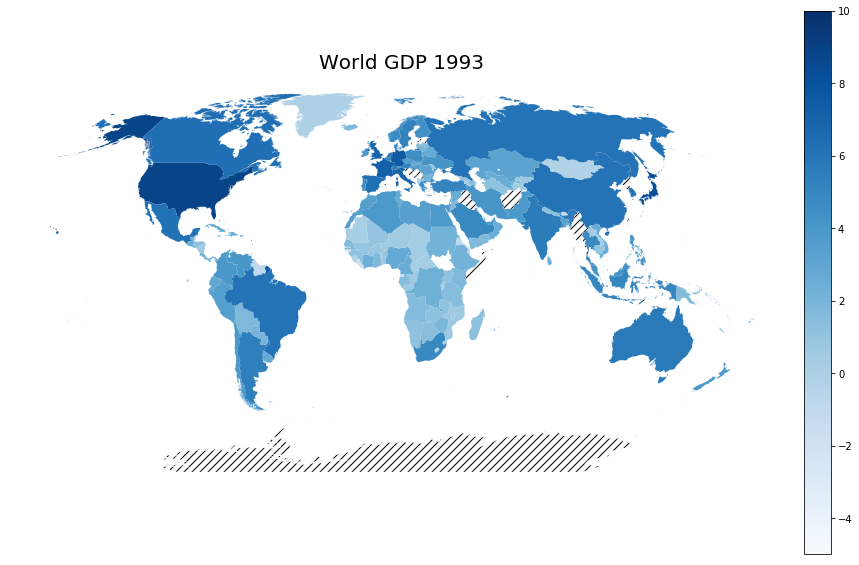

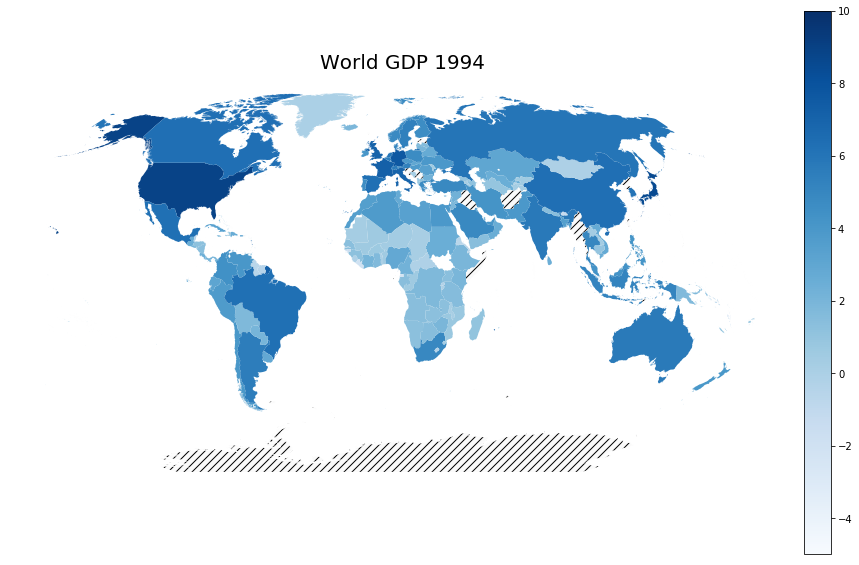

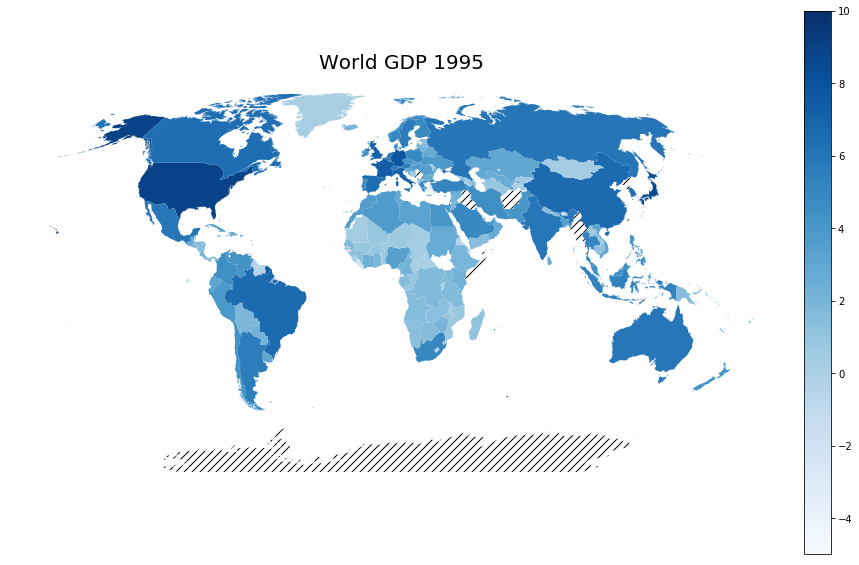

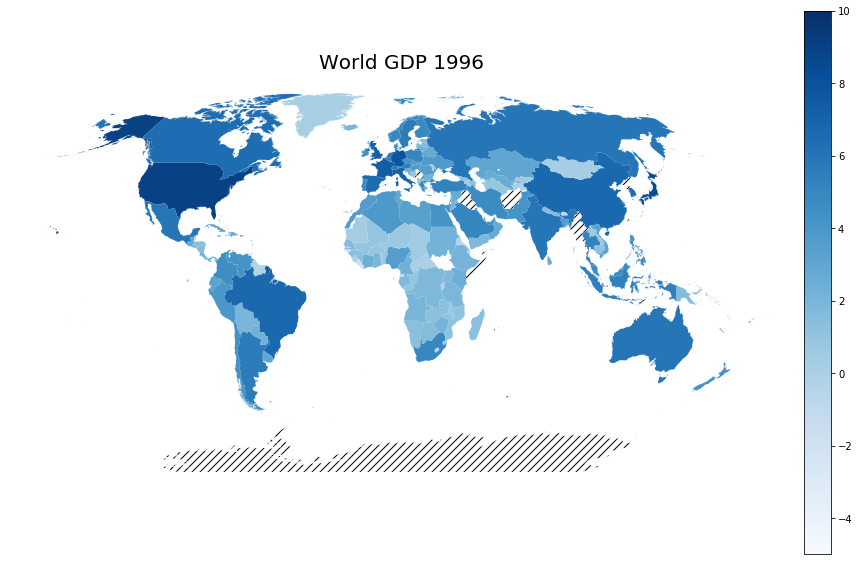

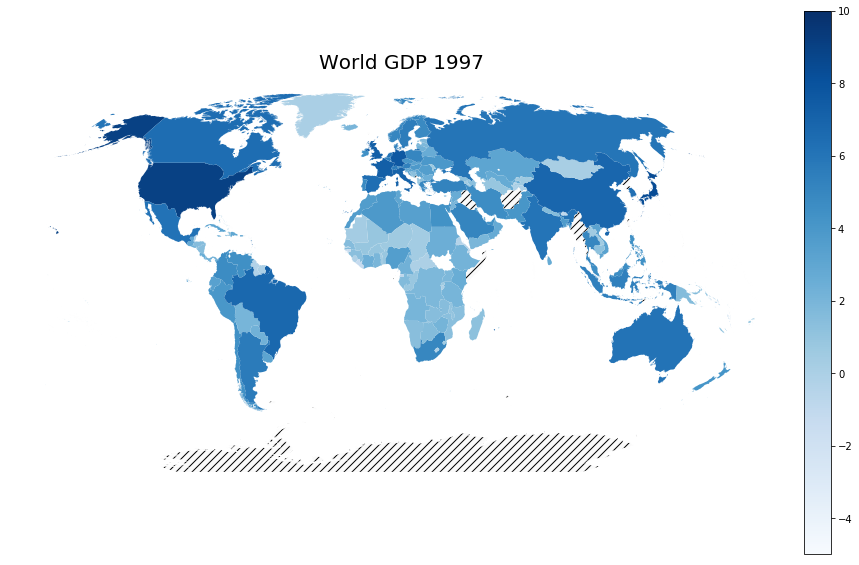

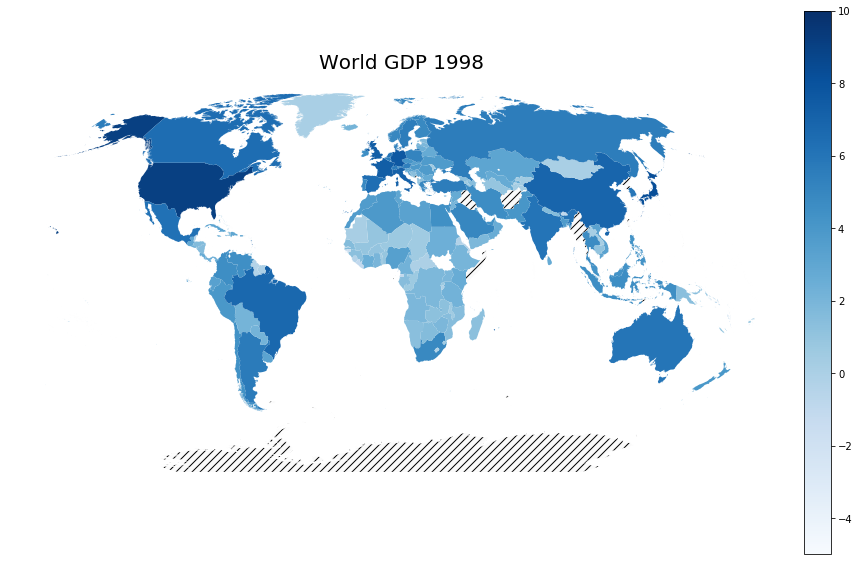

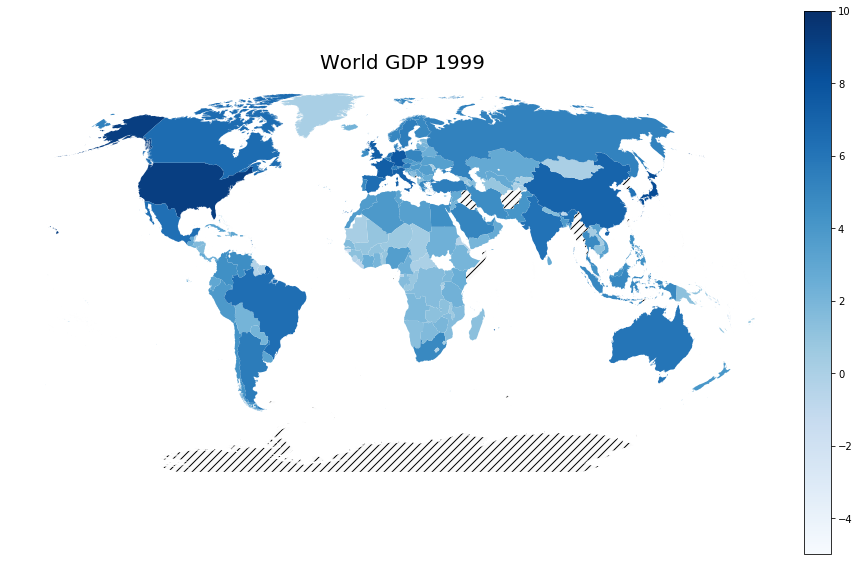

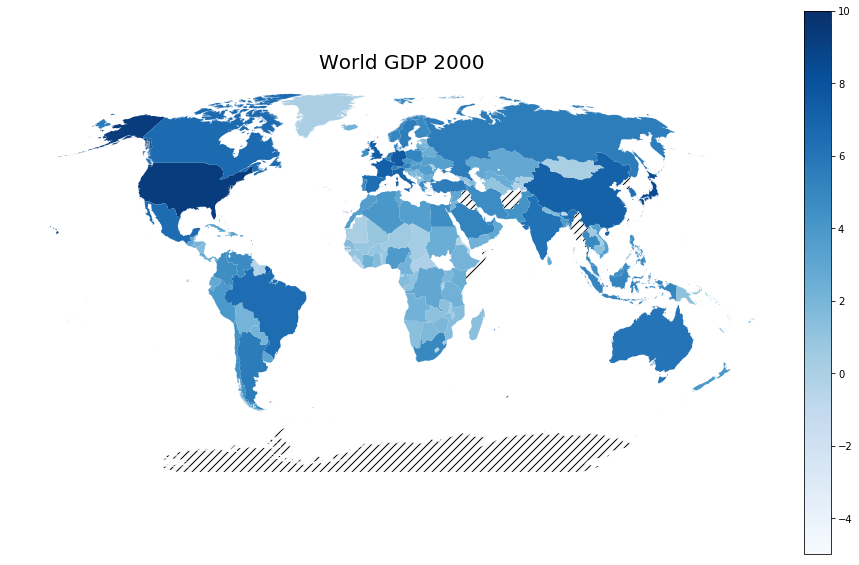

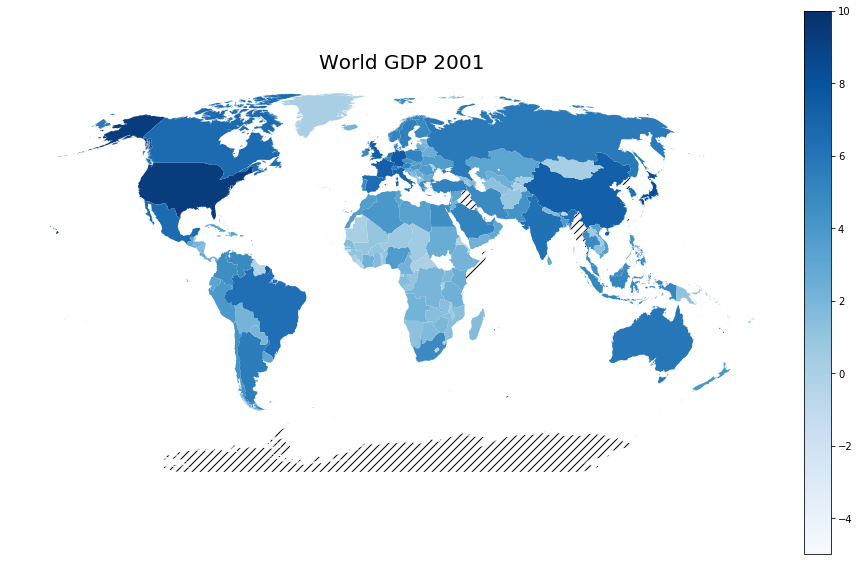

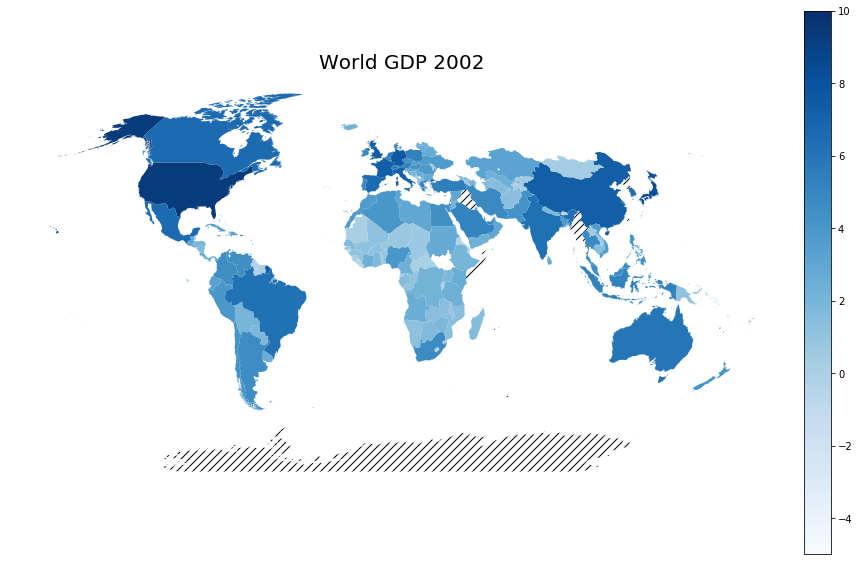

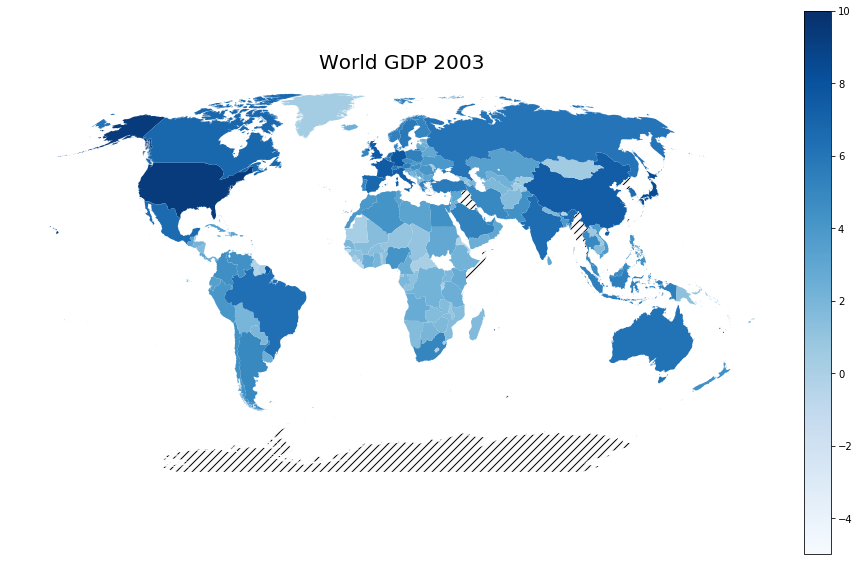

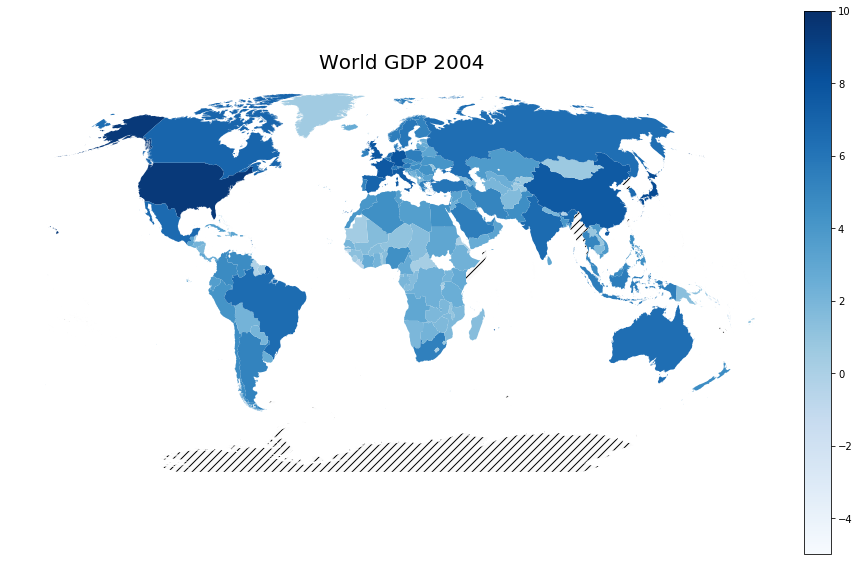

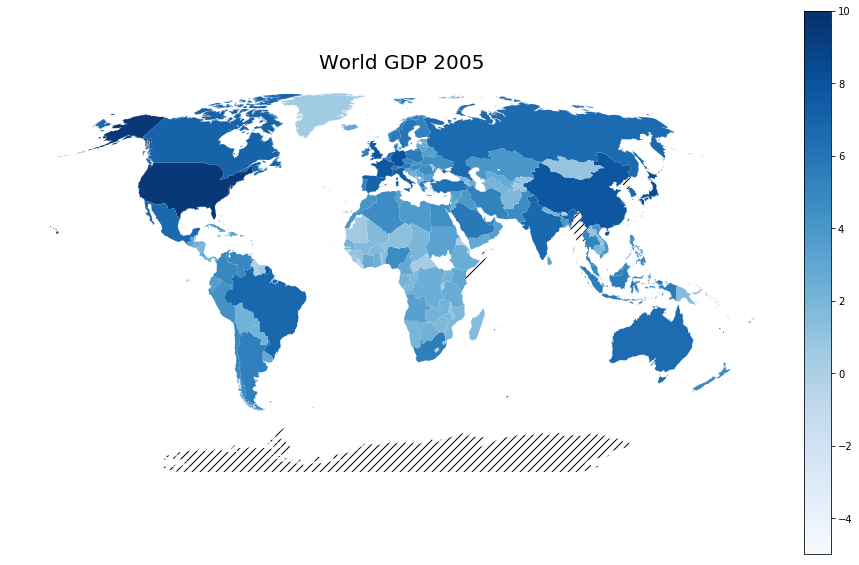

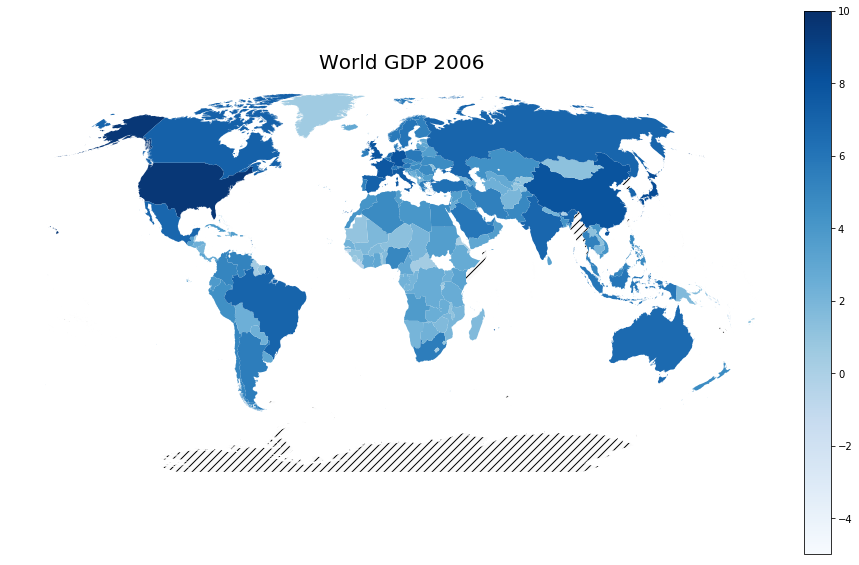

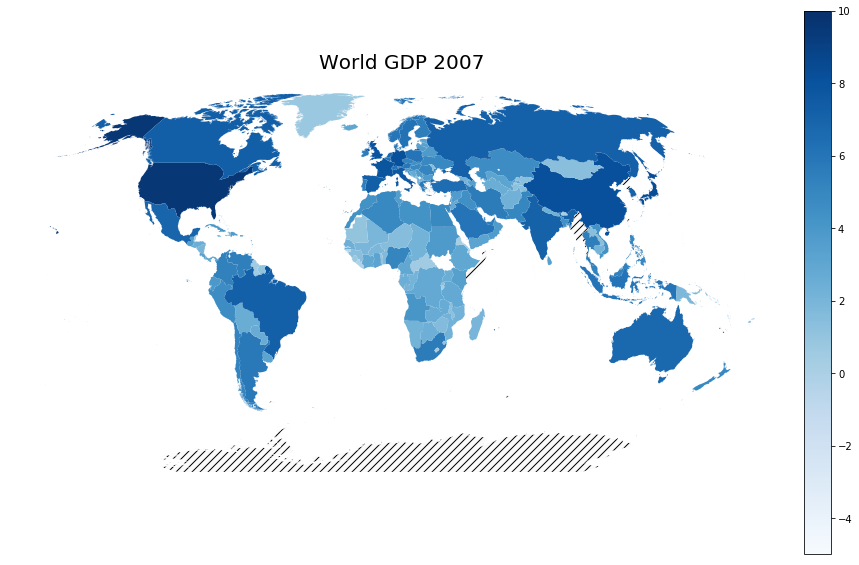

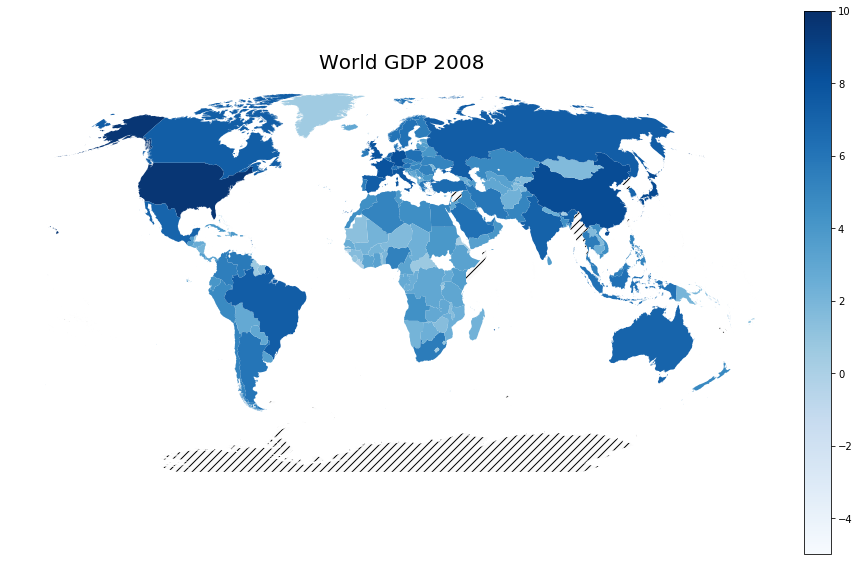

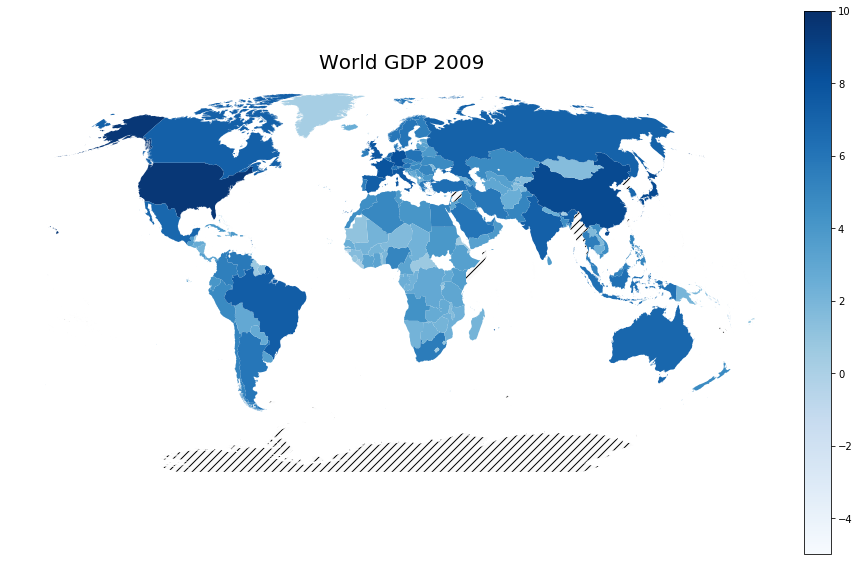

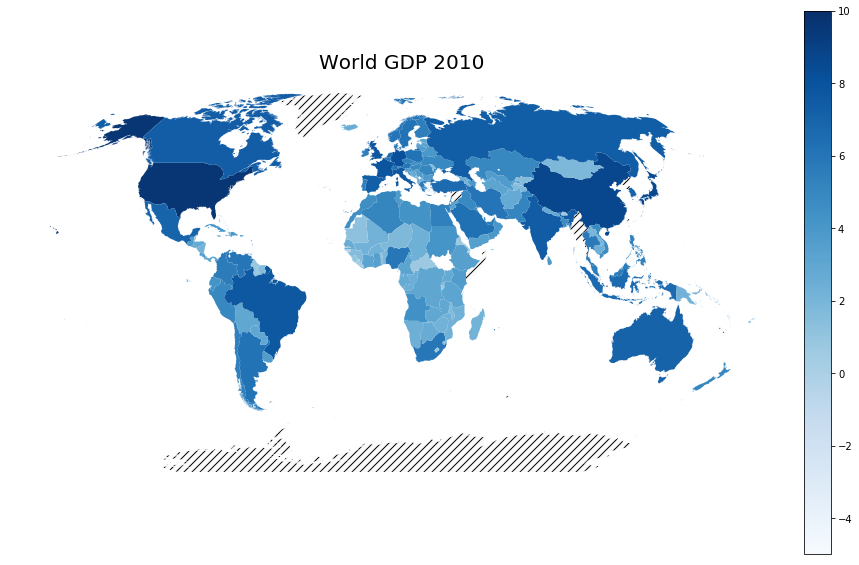

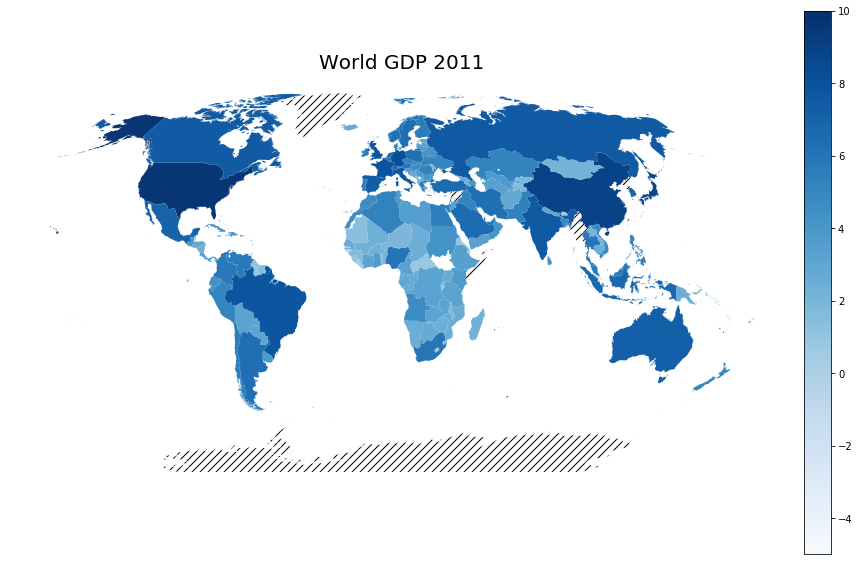

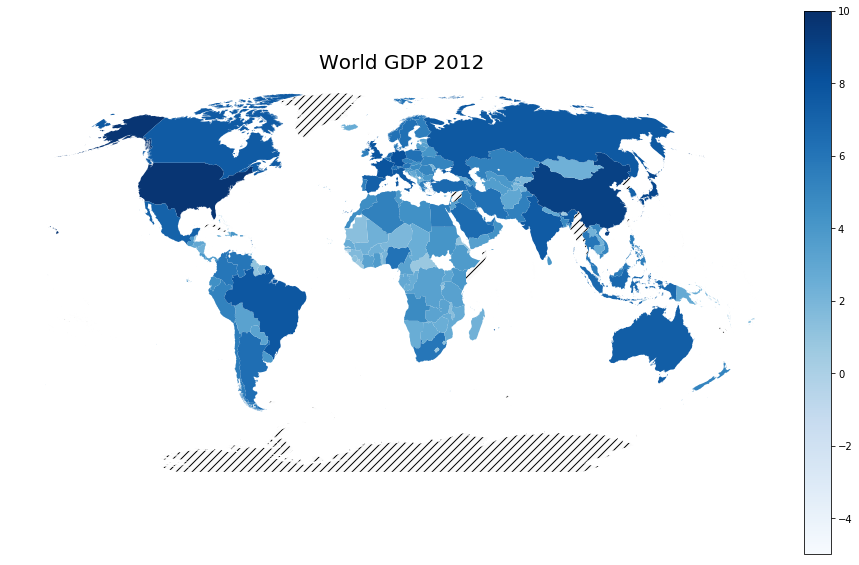

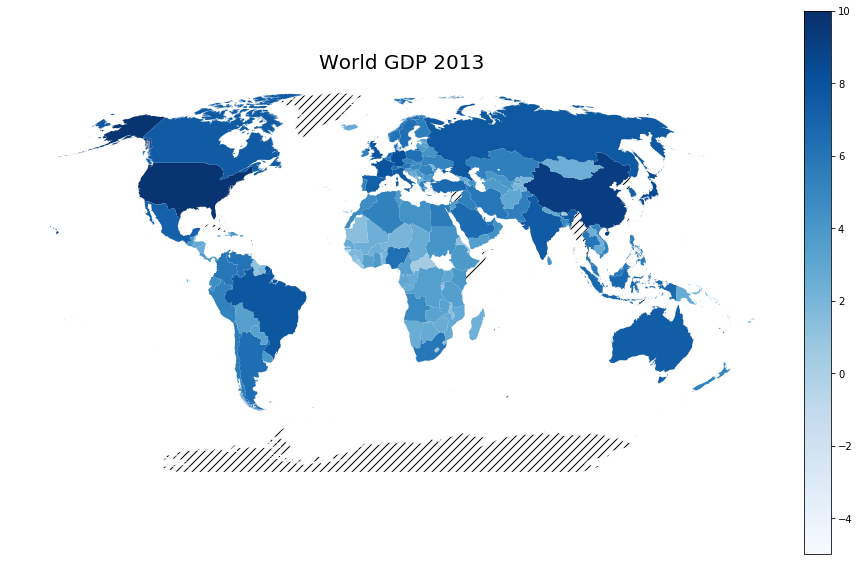

In [771]:
# For-loop to save multiple area lit maps 1992 - 2013 
from ipywidgets import *
gdp = data.copy()[['Code', 'Region','Year','GDP']]
vmin = np.floor(data['GDP'].describe()['min'])
vmax = np.ceil(data['GDP'].describe()['max'])

#shapefile = 'ne_10m_admin_0_countries.shp'
#gdf = gpd.read_file(shapefile)[['ADM0_A3', 'geometry']].to_crs('+proj=robin')
value = 'GDP'
colors = 6
cmap = 'Blues'
figsize = (16, 10)

for yr in list(range(1992, 2014)):
    print(yr)
    title = 'World GDP ' + str(yr)
    gdp_sub = gdp.loc[gdp['Year'] == yr]
    gdp_sub = gdp_sub.drop(columns = 'Year')
    gdp_merged = gdf.merge(gdp_sub, left_on='ADM0_A3', right_on='Code')
    ax = gdp_merged.dropna().plot(column = value , cmap=cmap, figsize=figsize, vmin = vmin, vmax = vmax, k = colors, legend=True)
    gdp_merged[gdp_merged.isna().any(axis=1)].plot(ax=ax, color='#fafafa', hatch='///')
    
    ax.set_title(title, fontdict={'fontsize': 20}, loc='center')
    # ax.annotate(description, xy=(0.1, 0.1), size=12, xycoords='figure fraction')
    ax.set_axis_off()
    ax.set_xlim([-1.5e7, 1.7e7])
    ax.get_legend()
    fig = ax.get_figure()
    figname = 'plot/gdp_' + str(yr) + '.pdf'
    fig.savefig(figname, bbox_inches='tight')

In [46]:
# Confirm 2002 Area lit missing for Russia
data.loc[(data['Region'] == 'Russia' )& (data['Year'] == 2002)] 

Empty DataFrame
Columns: [Code, Region, Year, Area Lit, Electricity Consumption, CO2 Emissions, GDP, Population, N2O Emissions, CH4 Emissions, Fluoride Emissions, Poverty Headcount Ratio]
Index: []

In [250]:
ind_merged = data.merge(country, left_on='Code', right_on = 'CountryCode' )

In [251]:
ind_merged.head()

Code Region  Year  Area Lit  Electricity Consumption  CO2 Emissions  \
0  ABW  Aruba  2013  4.794165                -0.177931      13.683593   
1  ABW  Aruba  2012  4.798167                -0.082621      14.079247   
2  ABW  Aruba  2011  4.794190                -0.092773      14.706916   
3  ABW  Aruba  2010  4.782062                -0.088700      14.714407   
4  ABW  Aruba  2009  4.661224                -0.179043      14.740918   

        GDP  Population  N2O Emissions  CH4 Emissions  \
0       NaN   11.541717            NaN            NaN   
1       NaN   11.536574            NaN            NaN   
2  0.949518   11.532100            NaN            NaN   
3  0.903288   11.528769            NaN            NaN   
4  0.915864   11.526986            NaN            NaN   

             ...             GovernmentAccountingConcept  \
0            ...                                     NaN   
1            ...                                     NaN   
2            ...                                     NaN   
3            ...                                     NaN   
4            ...                                     NaN   

   ImfDataDisseminationStandard LatestPopulationCensus LatestHouseholdSurvey  \
0                           NaN                   2010                   NaN   
1                           NaN                   2010                   NaN   
2                           NaN                   2010                   NaN   
3                           NaN                   2010                   NaN   
4                           NaN                   2010                   NaN   

  SourceOfMostRecentIncomeAndExpenditureData VitalRegistrationComplete  \
0                                        NaN                       Yes   
1                                        NaN                       Yes   
2                                        NaN                       Yes   
3                                        NaN                       Yes   
4                                        NaN                       Yes   

  LatestAgriculturalCensus LatestIndustrialData LatestTradeData  \
0                      NaN                  NaN          2012.0   
1                      NaN                  NaN          2012.0   
2                      NaN                  NaN          2012.0   
3                      NaN                  NaN          2012.0   
4                      NaN                  NaN          2012.0   

  LatestWaterWithdrawalData  
0                       NaN  
1                       NaN  
2                       NaN  
3                       NaN  
4                       NaN  

[5 rows x 37 columns]

In [48]:
all_merged['Continent'].value_counts()

Europe & Central Asia         1138
Sub-Saharan Africa            1012
Latin America & Caribbean      858
East Asia & Pacific            770
Middle East & North Africa     440
South Asia                     176
North America                   66
Name: Continent, dtype: int64

In [59]:
# Try alternative that includes all subplots
def ctn_gr(c):
    c_sub = all_merged[['Year', 'Continent', c]].copy()
    c_group = c_sub.groupby(['Year', 'Continent']).mean().reset_index()
    return(c_group)

In [60]:
alit_ctn_trend, elec_ctn_trend, co2_ctn_trend, gdp_ctn_trend = \
ctn_gr('Area Lit'), ctn_gr('Electricity Consumption'),\
ctn_gr('CO2 Emissions'), ctn_gr('GDP')

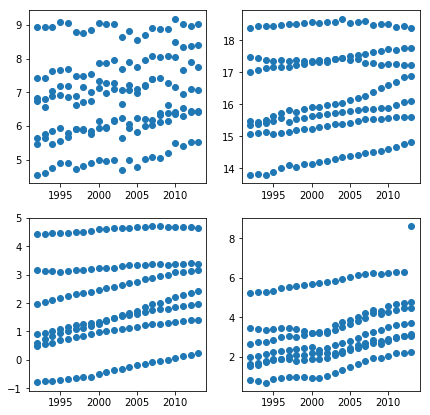

In [61]:
# Plotnine cannot draw subplots ...
# Cannot add smoother using matplotlib...
fig, axs = plt.subplots(2, 2, figsize = (7,7))
axs[0, 0].scatter(x = alit_ctn_trend['Year'], y = alit_ctn_trend['Area Lit'] )
axs[1, 0].scatter(x = elec_ctn_trend['Year'], y = elec_ctn_trend['Electricity Consumption'])
axs[0, 1].scatter(x = co2_ctn_trend['Year'], y = co2_ctn_trend['CO2 Emissions'])
axs[1, 1].scatter(x = gdp_ctn_trend['Year'], y = gdp_ctn_trend['GDP'])

In [137]:
all_merged['GDP_percapita'] = all_merged['GDP'] - all_merged['Population']

In [140]:
all_merged['nl_percapita'] = all_merged['Area Lit'] - all_merged['Population']

In [138]:
all_merged['GDP_percapita'].describe()

count    4112.000000
mean      -12.662319
std         1.649872
min       -16.551804
25%       -14.021646
50%       -12.709281
75%       -11.300781
max        -8.549468
Name: GDP_percapita, dtype: float64

In [141]:
all_merged['nl_percapita'].describe()

count    4136.000000
mean       -8.974882
std         1.734112
min       -15.920181
25%       -10.173264
50%        -8.668102
75%        -7.725663
max        -5.480673
Name: nl_percapita, dtype: float64

In [131]:
# Define a function of time trends of specified features
def fea_trend(f, c):
    c_sub = all_merged[['Year', f, c]].copy()
    c_group = c_sub.groupby(['Year', f]).mean().reset_index()
    gg_c = p9.ggplot(c_group)
    gg_c += p9.aes(x = 'Year', y = c, color = f)
    gg_c += p9.geom_point(alpha = 0.5, size=0.5)
    gg_c += p9.geom_smooth(method = 'loess')
    gg_c += p9.ggtitle('{} of Each {} by Year'.format(c, f))
    gg_c += p9.ylab(c) 
    gg_c += p9.xlab('Year')    
    return(gg_c)

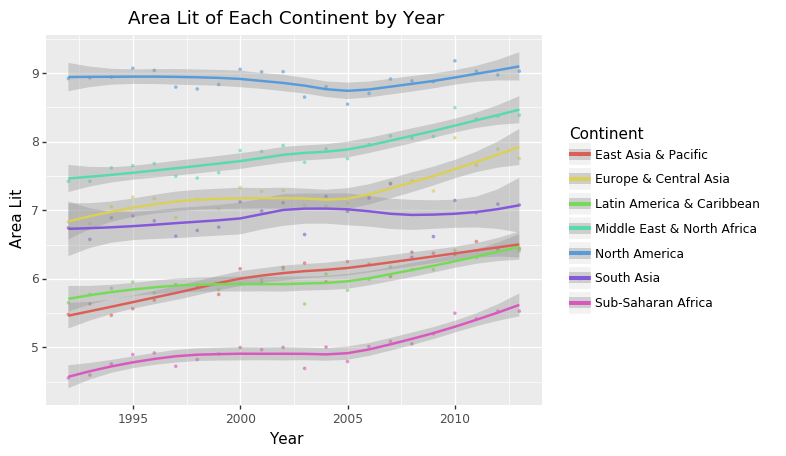

<ggplot: (7562081060)>

In [63]:
fea_trend('Continent', 'Area Lit')

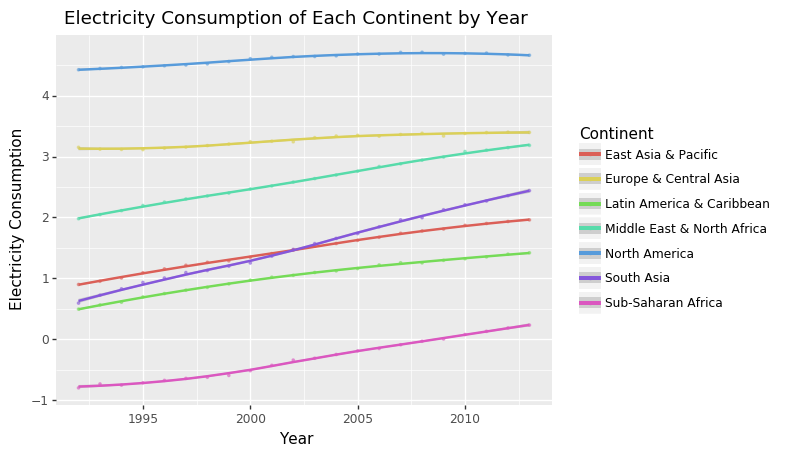

<ggplot: (7572555286)>

In [130]:
fea_trend('Continent', 'Electricity Consumption')

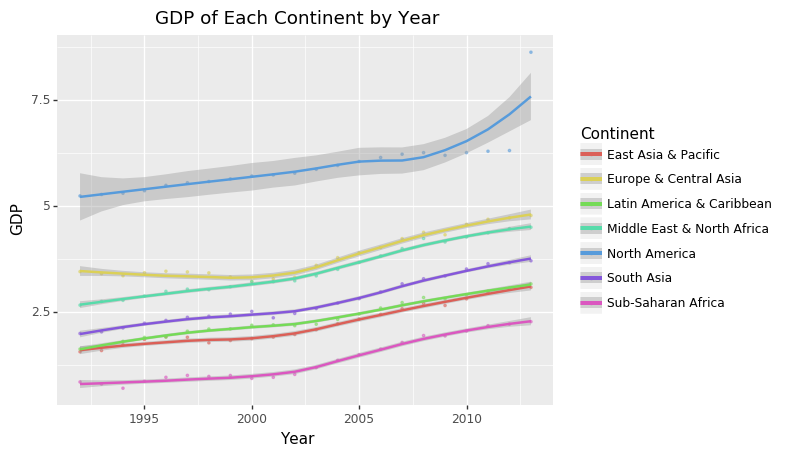

<ggplot: (7568182620)>

In [65]:
fea_trend('Continent', 'GDP')

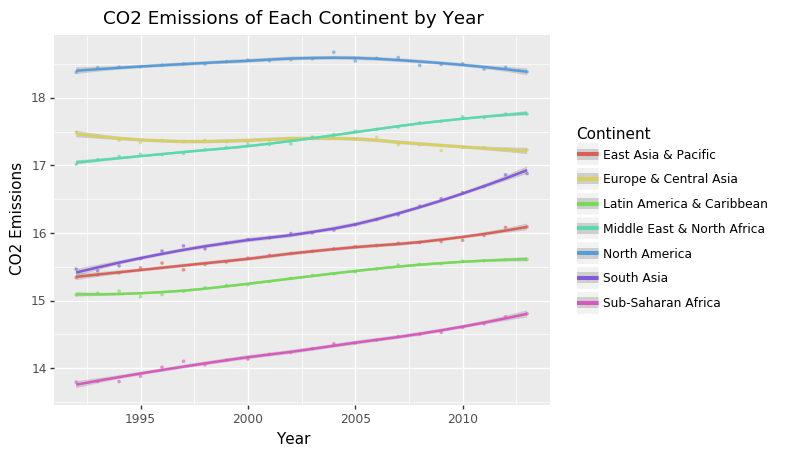

<ggplot: (7564359379)>

In [66]:
fea_trend('Continent', 'CO2 Emissions')

In [690]:
for inc in all_merged['IncomeGroup'].unique():
    print(inc)

Lower middle income
Upper middle income
High income: OECD
High income: nonOECD
Low income


In [713]:
# Save plots of measures by income groups
def save_trend(f, c):
    c_sub = all_merged[['Year', f, c]].copy()
    c_group = c_sub.groupby(['Year', f]).mean().reset_index()
    figname = figname = 'plot/inc_' + c[:4] +'.pdf'
    gg_c = p9.ggplot(c_group)
    gg_c += p9.aes(x = 'Year', y = c, color = f)
    gg_c += p9.geom_point(alpha = 0.5, size=0.5)
    gg_c += p9.geom_smooth(method = 'loess')
    gg_c += p9.ggtitle('{} of Each {} by Year'.format(c, f))
    gg_c += p9.ylab(c) 
    gg_c += p9.xlab('Year') 
    gg_c.save(figname)


In [714]:
save_trend('IncomeGroup', 'Area Lit')

/anaconda3/lib/python3.6/site-packages/plotnine/ggplot.py:706: UserWarning:

Saving 6.4 x 4.8 in image.

/anaconda3/lib/python3.6/site-packages/plotnine/ggplot.py:707: UserWarning:

Filename: plot/inc_Area.pdf



In [715]:
save_trend('IncomeGroup', 'GDP')

/anaconda3/lib/python3.6/site-packages/plotnine/ggplot.py:706: UserWarning:

Saving 6.4 x 4.8 in image.

/anaconda3/lib/python3.6/site-packages/plotnine/ggplot.py:707: UserWarning:

Filename: plot/inc_GDP.pdf



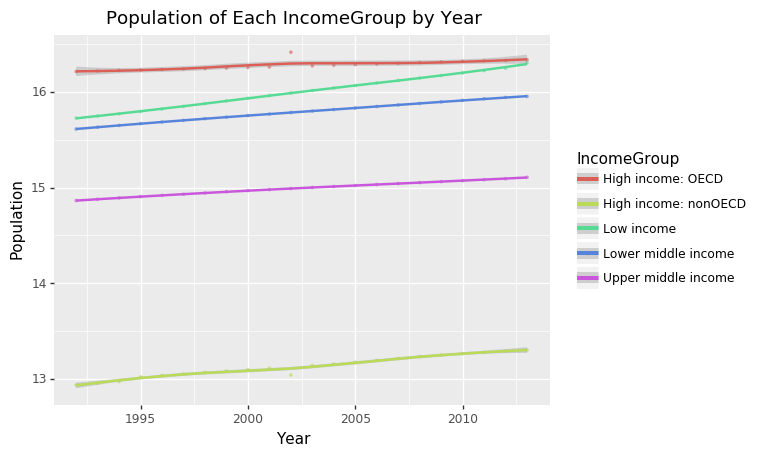

<ggplot: (-9223372029285578338)>

In [128]:
fea_trend('IncomeGroup', 'Population')

In [716]:
save_trend('IncomeGroup', 'GDP_percapita')

/anaconda3/lib/python3.6/site-packages/plotnine/ggplot.py:706: UserWarning:

Saving 6.4 x 4.8 in image.

/anaconda3/lib/python3.6/site-packages/plotnine/ggplot.py:707: UserWarning:

Filename: plot/inc_GDP_.pdf



In [717]:
save_trend('IncomeGroup', 'nl_percapita')

/anaconda3/lib/python3.6/site-packages/plotnine/ggplot.py:706: UserWarning:

Saving 6.4 x 4.8 in image.

/anaconda3/lib/python3.6/site-packages/plotnine/ggplot.py:707: UserWarning:

Filename: plot/inc_nl_p.pdf



In [718]:
save_trend('IncomeGroup', 'CO2 Emissions')

/anaconda3/lib/python3.6/site-packages/plotnine/ggplot.py:706: UserWarning:

Saving 6.4 x 4.8 in image.

/anaconda3/lib/python3.6/site-packages/plotnine/ggplot.py:707: UserWarning:

Filename: plot/inc_CO2 .pdf



In [719]:
save_trend('IncomeGroup', 'Electricity Consumption')

/anaconda3/lib/python3.6/site-packages/plotnine/ggplot.py:706: UserWarning:

Saving 6.4 x 4.8 in image.

/anaconda3/lib/python3.6/site-packages/plotnine/ggplot.py:707: UserWarning:

Filename: plot/inc_Elec.pdf



In [62]:
# Alternative: Define a function of continent-level time trends
def line_trend(c):
    c_sub = all_merged[['Year', 'Continent', c]].copy()
    c_group = c_sub.groupby(['Year', 'Continent']).mean().reset_index()
    gg_c = p9.ggplot(c_group)
    gg_c += p9.aes(x = 'Year', y = c, color = 'Continent')
    gg_c += p9.geom_line(alpha = 0.5, size=0.5)
    gg_c += p9.ggtitle('{} of Each Continent by Year'.format(c))
    gg_c += p9.ylab(c) 
    gg_c += p9.xlab('Year')    
    return(gg_c)

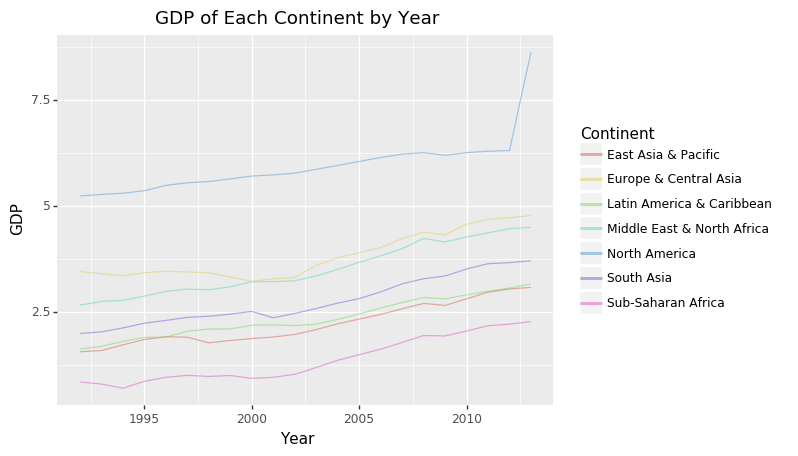

<ggplot: (-9223372029286517991)>

In [306]:
ctn_trend('GDP')

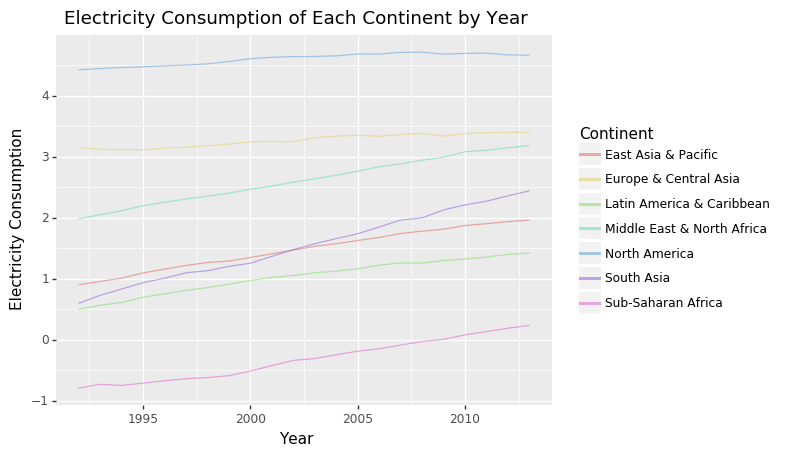

<ggplot: (7568260949)>

In [307]:
ctn_trend('Electricity Consumption')

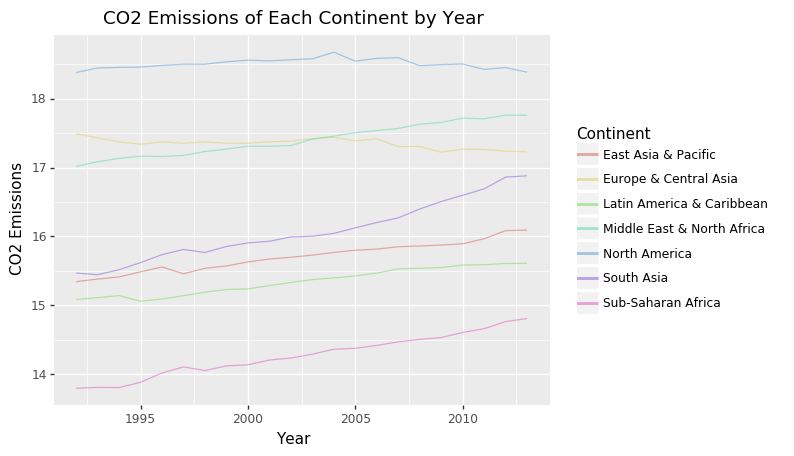

<ggplot: (-9223372029286550261)>

In [308]:
ctn_trend('CO2 Emissions')

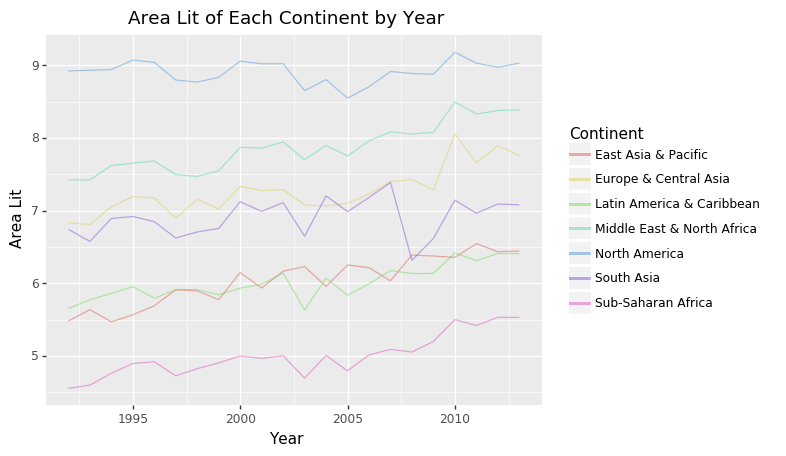

<ggplot: (7567617060)>

In [309]:
ctn_trend('Area Lit')

In [68]:
all_merged.loc[(all_merged['IncomeGroup'] == 'High income: nonOECD')]['Region'].unique()

array(['Argentina', 'Cyprus', 'Saint Martin', 'Oman', 'Lithuania',
       'Uruguay', 'Russia', 'Latvia', 'United Arab Emirates',
       'Liechtenstein', 'Croatia', 'Qatar', 'Saudi Arabia', 'San Marino',
       'Kuwait', 'Brunei Darussalam', 'Monaco', 'Venezuela',
       'Equatorial Guinea', 'Hong Kong', 'Greenland', 'New Caledonia',
       'Aruba', 'Bahamas', 'Turks and Caicos Islands', 'French Polynesia',
       'Seychelles', 'Trinidad and Tobago', 'Barbados',
       'Antigua and Barbuda', 'Saint Kitts and Nevis',
       'United States Virgin Islands', 'Puerto Rico', 'Cayman Islands',
       'Bermuda', 'Malta', 'Faroe Islands', 'Singapore', 'Guam',
       'Northern Mariana Islands', 'Bahrain', 'Macau'], dtype=object)

In [122]:
all_merged['nonOECD'] = np.where(all_merged['IncomeGroup'] == 'High income: nonOECD', 'High income: nonOECD', 'Other')

In [123]:
all_merged.head()

ADM0_A3                                           geometry Code     Region  \
0     IDN  (POLYGON ((11108970.26020776 445285.1302330397...  IDN  Indonesia   
1     IDN  (POLYGON ((11108970.26020776 445285.1302330397...  IDN  Indonesia   
2     IDN  (POLYGON ((11108970.26020776 445285.1302330397...  IDN  Indonesia   
3     IDN  (POLYGON ((11108970.26020776 445285.1302330397...  IDN  Indonesia   
4     IDN  (POLYGON ((11108970.26020776 445285.1302330397...  IDN  Indonesia   

   Year  Area Lit  Electricity Consumption  CO2 Emissions       GDP  \
0  2013  9.551737                 5.211580      19.987973  6.766590   
1  2012  9.622070                 5.120900      20.211673  6.776187   
2  2011  9.322483                 5.055170      20.150537  6.740439   
3  2010  9.469328                 4.977307      19.895402  6.564125   
4  2009  8.985433                 4.893862      19.931636  6.290791   

   Population   ...                  ImfDataDisseminationStandard  \
0   19.342032   ...    Special Data Dissemination Standard (SDDS)   
1   19.329092   ...    Special Data Dissemination Standard (SDDS)   
2   19.315986   ...    Special Data Dissemination Standard (SDDS)   
3   19.302848   ...    Special Data Dissemination Standard (SDDS)   
4   19.289734   ...    Special Data Dissemination Standard (SDDS)   

   LatestPopulationCensus                      LatestHouseholdSurvey  \
0                    2010  Demographic and Health Survey (DHS), 2012   
1                    2010  Demographic and Health Survey (DHS), 2012   
2                    2010  Demographic and Health Survey (DHS), 2012   
3                    2010  Demographic and Health Survey (DHS), 2012   
4                    2010  Demographic and Health Survey (DHS), 2012   

   SourceOfMostRecentIncomeAndExpenditureData VitalRegistrationComplete  \
0     Integrated household survey (IHS), 2013                       NaN   
1     Integrated household survey (IHS), 2013                       NaN   
2     Integrated household survey (IHS), 2013                       NaN   
3     Integrated household survey (IHS), 2013                       NaN   
4     Integrated household survey (IHS), 2013                       NaN   

  LatestAgriculturalCensus LatestIndustrialData LatestTradeData  \
0                     2013               2011.0          2013.0   
1                     2013               2011.0          2013.0   
2                     2013               2011.0          2013.0   
3                     2013               2011.0          2013.0   
4                     2013               2011.0          2013.0   

  LatestWaterWithdrawalData nonOECD  
0                    2000.0   Other  
1                    2000.0   Other  
2                    2000.0   Other  
3                    2000.0   Other  
4                    2000.0   Other  

[5 rows x 40 columns]

In [663]:
all_merged_2013 = all_merged.loc[all_merged['Year'] == 2013]

In [120]:
all_merged_2013.shape

(203, 40)

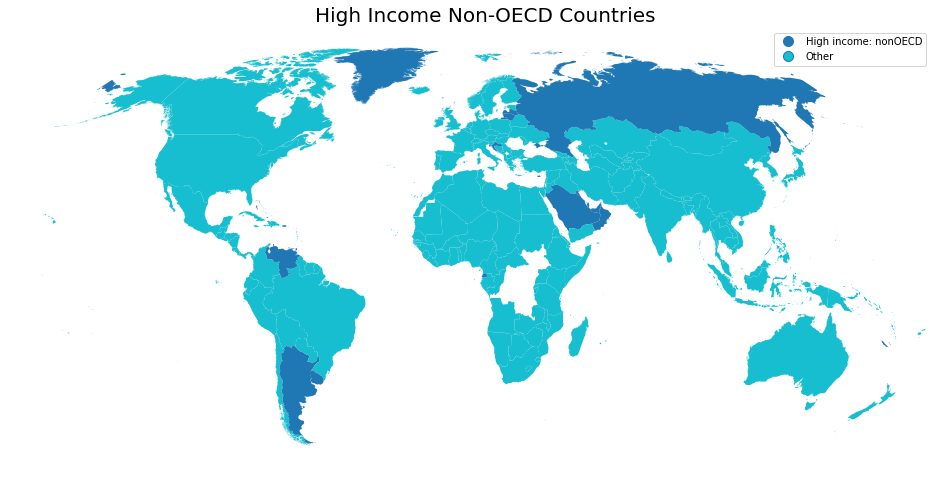

In [662]:
# Map of nonOECD High income countries 2013 
figsize = (16, 10)
title = 'High Income Non-OECD Countries'
all_merged_2013 = all_merged.loc[all_merged['Year'] == 2013]
ax = all_merged_2013.plot(column='nonOECD',figsize=figsize, categorical = True, legend = True)
#all_merged_2013[all_merged_2013.isna().any(axis=1)].plot(ax=ax, color='#fafafa', hatch='///')
    
ax.set_title(title, fontdict={'fontsize': 20}, loc='center')
# ax.annotate(description, xy=(0.1, 0.1), size=12, xycoords='figure fraction')
ax.set_axis_off()
ax.set_xlim([-1.5e7, 1.7e7])
ax.get_legend()
#ax.get_figure()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/anaconda3/lib/python3.6/site-packages/matplotlib/legend.py:798: UserWarning:

Legend does not support 1 instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists

/anaconda3/lib/python3.6/site-packages/matplotlib/legend.py:798: UserWarning:

Legend does not support 2 instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists

/anaconda3/lib/python3.6/site-packages/matplotlib/legend.py:798: UserWarning:

Legend does not support 3 inst

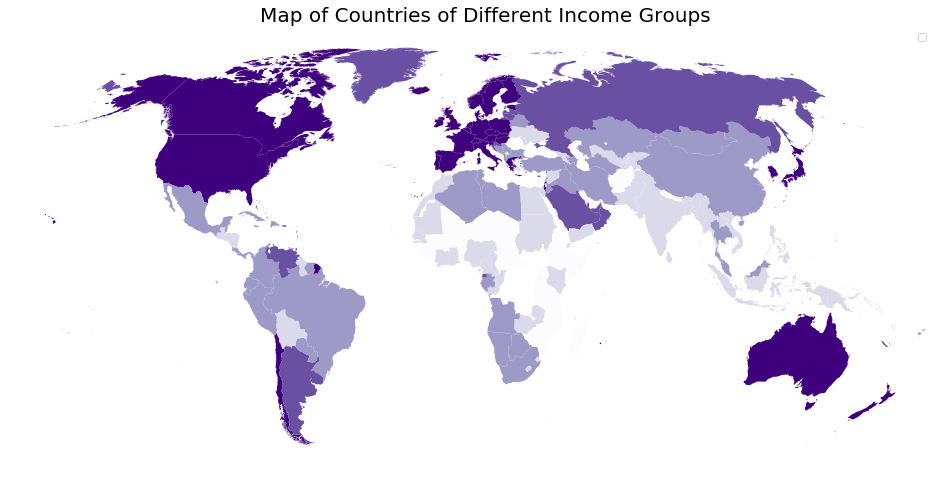

In [726]:
# Map of different income groups countries 2013 
figsize = (16, 10)
cmap = 'Purples'
title = 'Map of Countries of Different Income Groups'
all_merged_2013 = all_merged.loc[all_merged['Year'] == 2013]

incgr_key = {'High income: OECD': 5, 'High income: nonOECD': 4, 'Upper middle income': 3, 'Lower middle income':2,
            'Low income' : 1}
all_merged_2013['incgroup'] = all_merged_2013['IncomeGroup'].copy().replace(incgr_key)

ax = all_merged_2013.plot(column='incgroup',cmap = cmap, figsize=figsize, categorical = True, legend = True)
#all_merged_2013[all_merged_2013.isna().any(axis=1)].plot(ax=ax, color='#fafafa', hatch='///')
    
ax.set_title(title, fontdict={'fontsize': 20}, loc='center')
# ax.annotate(description, xy=(0.1, 0.1), size=12, xycoords='figure fraction')
ax.set_axis_off()
ax.set_xlim([-1.5e7, 1.7e7])
ax.legend((1, 2, 3, 4, 5 ), ('Low income','Lower middle income', 'Upper middle income' , 'High income: nonOECD',
                           'High income: OECD' ))
ax.get_legend()
#ax.get_figure()

In [735]:
all_merged_2013['IncomeGroup'].unique()

[Lower middle income, Upper middle income, High income: OECD, High income: nonOECD, Low income]
Categories (5, object): [Lower middle income, Upper middle income, High income: OECD, High income: nonOECD, Low income]

In [745]:
all_merged_2013 = all_merged.copy().loc[all_merged['Year'] == 2013]
all_merged_2013['IncomeGroup'] = all_merged_2013['IncomeGroup'].astype('category')
all_merged_2013['IncomeGroup']
all_merged_2013['IncomeGroup'].cat.reorder_categories(['Low income', 'Lower middle income', 'Upper middle income',
'High income: nonOECD','High income: OECD' ])
all_merged_2013['IncomeGroup'].unique()

SyntaxError: invalid syntax (<ipython-input-745-474875ca4d3d>, line 4)

In [750]:
inc_group = CategoricalDtype(categories=['Low income', 'Lower middle income', 'Upper middle income',
'High income: nonOECD','High income: OECD' ], ordered=True)
all_merged_2013 = all_merged.copy().loc[all_merged['Year'] == 2013]
all_merged_2013['IncomeGroup'] = all_merged_2013['IncomeGroup'].astype(inc_group)
all_merged_2013['IncomeGroup'].unique()

[Lower middle income, Upper middle income, High income: OECD, High income: nonOECD, Low income]
Categories (5, object): [Low income < Lower middle income < Upper middle income < High income: nonOECD < High income: OECD]

[Lower middle income, Upper middle income, High income: OECD, High income: nonOECD, Low income]
Categories (5, object): [Low income < Lower middle income < Upper middle income < High income: nonOECD < High income: OECD]


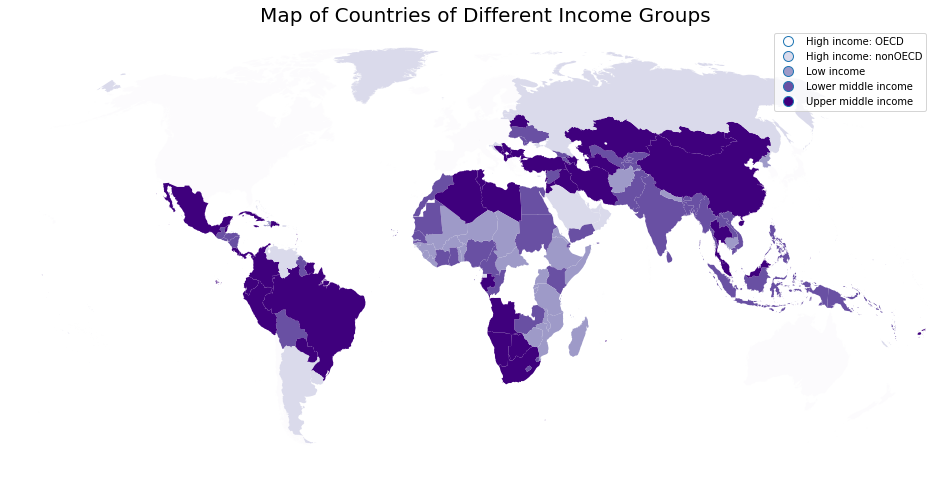

In [752]:
# Map of different income groups countries 2013 
figsize = (16, 10)
cmap = 'Purples'
title = 'Map of Countries of Different Income Groups'
inc_group = CategoricalDtype(categories=['Low income', 'Lower middle income', 'Upper middle income',
'High income: nonOECD','High income: OECD' ], ordered=True)
all_merged_2013 = all_merged.copy().loc[all_merged['Year'] == 2013]
all_merged_2013['IncomeGroup'] = all_merged_2013['IncomeGroup'].astype(inc_group)
print(all_merged_2013['IncomeGroup'].unique())

ax = all_merged_2013.plot(column='IncomeGroup',cmap = cmap, figsize=figsize, categorical = True, legend = True)
#all_merged_2013[all_merged_2013.isna().any(axis=1)].plot(ax=ax, color='#fafafa', hatch='///')
    
ax.set_title(title, fontdict={'fontsize': 20}, loc='center')
# ax.annotate(description, xy=(0.1, 0.1), size=12, xycoords='figure fraction')
ax.set_axis_off()
ax.set_xlim([-1.5e7, 1.7e7])
ax.get_legend()
#ax.get_figure()

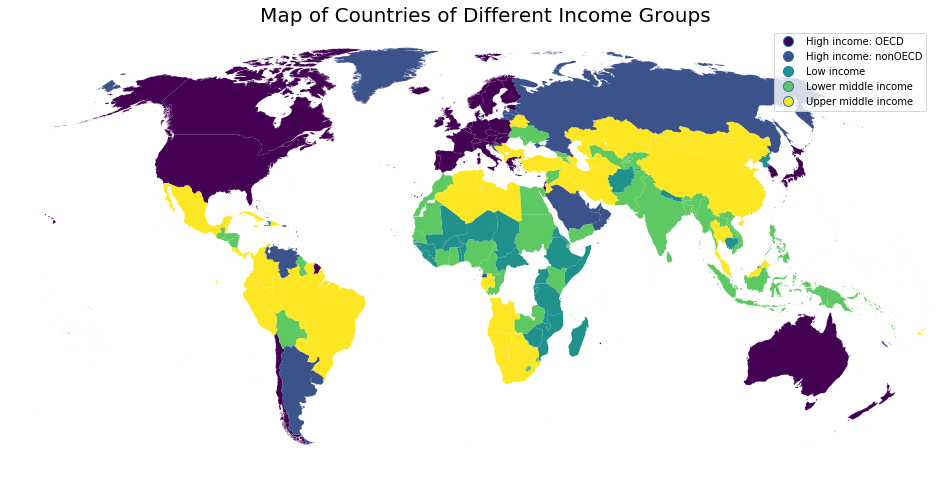

In [762]:
# Map of countries in different income group  
figsize = (16, 10)
cmap = 'viridis'
title = 'Map of Countries of Different Income Groups'
all_merged_2013 = all_merged.loc[all_merged['Year'] == 2013]
ax = all_merged_2013.plot(column='IncomeGroup', cmap = cmap, figsize=figsize, categorical = True, legend = True)
#all_merged_2013[all_merged_2013.isna().any(axis=1)].plot(ax=ax, color='#fafafa', hatch='///')
    
ax.set_title(title, fontdict={'fontsize': 20}, loc='center')
# ax.annotate(description, xy=(0.1, 0.1), size=12, xycoords='figure fraction')
ax.set_axis_off()
ax.set_xlim([-1.5e7, 1.7e7])
ax.get_legend()
fig = ax.get_figure()
fig.savefig('plot/map_inc.pdf')


In [86]:
all_merged['IncomeGroup'].unique()

array(['Lower middle income', 'Upper middle income', 'High income: OECD',
       'High income: nonOECD', 'Low income'], dtype=object)

In [143]:
gdf.head()

ADM0_A3                                           geometry
0     IDN  (POLYGON ((11108970.26020776 445285.1302330397...
1     MYS  (POLYGON ((11108970.26020776 445285.1302330397...
2     CHL  (POLYGON ((-6477059.899247097 -1872360.8384665...
3     BOL  POLYGON ((-6477059.899247097 -1872360.83846657...
4     PER  (POLYGON ((-6477059.899247097 -1872360.8384665...

In [145]:
gdf['ADM0_A3']

0      IDN
1      MYS
2      CHL
3      BOL
4      PER
5      ARG
6      ESB
7      CYP
8      IND
9      CHN
10     ISR
11     PSX
12     LBN
13     ETH
14     SDS
15     SOM
16     KEN
17     PAK
18     MWI
19     TZA
20     SYR
21     SOL
22     FRA
23     SUR
24     GUY
25     KOR
26     PRK
27     MAR
28     SAH
29     CRI
      ... 
225    IOA
226    IOT
227    SGP
228    NFK
229    COK
230    TON
231    WLF
232    WSM
233    SLB
234    TUV
235    MDV
236    NRU
237    FSM
238    SGS
239    FLK
240    VUT
241    NIU
242    ASM
243    PLW
244    GUM
245    MNP
246    BHR
247    CSI
248    PGA
249    CLP
250    MAC
251    ATC
252    BJN
253    SER
254    SCR
Name: ADM0_A3, Length: 255, dtype: object

In [151]:
countrydf.head()

CountryCode       ShortName       TableName  \
0         AFG     Afghanistan     Afghanistan   
1         ALB         Albania         Albania   
2         DZA         Algeria         Algeria   
3         ASM  American Samoa  American Samoa   
4         ADO         Andorra         Andorra   

                                  LongName Alpha2Code    CurrencyUnit  \
0             Islamic State of Afghanistan         AF  Afghan afghani   
1                      Republic of Albania         AL    Albanian lek   
2  People's Democratic Republic of Algeria         DZ  Algerian dinar   
3                           American Samoa         AS     U.S. dollar   
4                  Principality of Andorra         AD            Euro   

                                        SpecialNotes  \
0  Fiscal year end: March 20; reporting period fo...   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                       Region           IncomeGroup Wb2Code  \
0                  South Asia            Low income      AF   
1       Europe & Central Asia   Upper middle income      AL   
2  Middle East & North Africa   Upper middle income      DZ   
3         East Asia & Pacific   Upper middle income      AS   
4       Europe & Central Asia  High income: nonOECD      AD   

             ...                 GovernmentAccountingConcept  \
0            ...             Consolidated central government   
1            ...                Budgetary central government   
2            ...                Budgetary central government   
3            ...                                         NaN   
4            ...                                         NaN   

               ImfDataDisseminationStandard  \
0  General Data Dissemination System (GDDS)   
1  General Data Dissemination System (GDDS)   
2  General Data Dissemination System (GDDS)   
3                                       NaN   
4                                       NaN   

                              LatestPopulationCensus  \
0                                               1979   
1                                               2011   
2                                               2008   
3                                               2010   
4  2011. Population data compiled from administra...   

                               LatestHouseholdSurvey  \
0  Multiple Indicator Cluster Survey (MICS), 2010/11   
1       Demographic and Health Survey (DHS), 2008/09   
2     Multiple Indicator Cluster Survey (MICS), 2012   
3                                                NaN   
4                                                NaN   

          SourceOfMostRecentIncomeAndExpenditureData  \
0            Integrated household survey (IHS), 2008   
1  Living Standards Measurement Study Survey (LSM...   
2            Integrated household survey (IHS), 1995   
3                                                NaN   
4                                                NaN   

  VitalRegistrationComplete LatestAgriculturalCensus LatestIndustrialData  \
0                       NaN                  2013/14                  NaN   
1                       Yes                     2012               2011.0   
2                       NaN                      NaN               2010.0   
3                       Yes                     2007                  NaN   
4                       Yes                      NaN                  NaN   

  LatestTradeData LatestWaterWithdrawalData  
0          2013.0                    2000.0  
1          2013.0                    2006.0  
2          2013.0                    2001.0  
3             NaN                       NaN  
4          2006.0                       NaN  

[5 rows x 31 columns]

In [172]:
gdf2

featurecla  scalerank  LABELRANK                      SOVEREIGNT  \
0    Admin-0 country          5          2                       Indonesia   
1    Admin-0 country          5          3                        Malaysia   
2    Admin-0 country          6          2                           Chile   
3    Admin-0 country          0          3                         Bolivia   
4    Admin-0 country          0          2                            Peru   
5    Admin-0 country          0          2                       Argentina   
6    Admin-0 country          3          3                  United Kingdom   
7    Admin-0 country          6          5                          Cyprus   
8    Admin-0 country          0          2                           India   
9    Admin-0 country          0          2                           China   
10   Admin-0 country          0          4                          Israel   
11   Admin-0 country          0          5                          Israel   
12   Admin-0 country          0          5                         Lebanon   
13   Admin-0 country          0          2                        Ethiopia   
14   Admin-0 country          0          3                     South Sudan   
15   Admin-0 country          0          6                         Somalia   
16   Admin-0 country          0          2                           Kenya   
17   Admin-0 country          0          2                        Pakistan   
18   Admin-0 country          0          6                          Malawi   
19   Admin-0 country          0          3     United Republic of Tanzania   
20   Admin-0 country          0          3                           Syria   
21   Admin-0 country          0          5                      Somaliland   
22   Admin-0 country          0          2                          France   
23   Admin-0 country          0          4                        Suriname   
24   Admin-0 country          0          4                          Guyana   
25   Admin-0 country          0          2                     South Korea   
26   Admin-0 country          0          3                     North Korea   
27   Admin-0 country          0          3                         Morocco   
28   Admin-0 country          0          7                  Western Sahara   
29   Admin-0 country          0          5                      Costa Rica   
..               ...        ...        ...                             ...   
225  Admin-0 country          6          5                       Australia   
226  Admin-0 country          5          5                  United Kingdom   
227  Admin-0 country          3          6                       Singapore   
228  Admin-0 country          6          5                       Australia   
229  Admin-0 country          6          4                     New Zealand   
230  Admin-0 country          5          4                           Tonga   
231  Admin-0 country          5          4                          France   
232  Admin-0 country          3          4                           Samoa   
233  Admin-0 country          5          3                 Solomon Islands   
234  Admin-0 country          5          6                          Tuvalu   
235  Admin-0 country          6          5                        Maldives   
236  Admin-0 country          5          6                           Nauru   
237  Admin-0 country          5          6  Federated States of Micronesia   
238  Admin-0 country          6          4                  United Kingdom   
239  Admin-0 country          5          5                  United Kingdom   
240  Admin-0 country          5          4                         Vanuatu   
241  Admin-0 country          5          4                     New Zealand   
242  Admin-0 country          5          4        United States of America   
243  Admin-0 country          6          6                           Palau   
244  Admin-0 country          5 

In [164]:
a = gdf2['ADM0_A3'].unique()
b = countrydf['CountryCode'].unique()
c = data['Code'].unique()

In [180]:
len(set(a).symmetric_difference(set(b)))

92

In [182]:
set(a).symmetric_difference(set(b))

{'ADO',
 'AIA',
 'ALD',
 'AND',
 'ARB',
 'ATA',
 'ATC',
 'ATF',
 'BJN',
 'BLM',
 'CEB',
 'CHI',
 'CLP',
 'CNM',
 'COD',
 'COK',
 'CSI',
 'CSS',
 'CYN',
 'EAP',
 'EAS',
 'ECA',
 'ECS',
 'EMU',
 'ESB',
 'EUU',
 'FCS',
 'FLK',
 'GGY',
 'GIB',
 'HIC',
 'HMD',
 'HPC',
 'IMN',
 'IMY',
 'IOA',
 'IOT',
 'JEY',
 'KAB',
 'KAS',
 'KOS',
 'KSV',
 'LAC',
 'LCN',
 'LDC',
 'LIC',
 'LMC',
 'LMY',
 'MEA',
 'MIC',
 'MNA',
 'MSR',
 'NAC',
 'NFK',
 'NIU',
 'NOC',
 'NRU',
 'OEC',
 'OED',
 'OSS',
 'PCN',
 'PGA',
 'PSS',
 'PSX',
 'ROM',
 'ROU',
 'SAH',
 'SAS',
 'SCR',
 'SDS',
 'SER',
 'SGS',
 'SHN',
 'SOL',
 'SPM',
 'SSA',
 'SSD',
 'SSF',
 'SST',
 'TLS',
 'TMP',
 'TWN',
 'UMC',
 'UMI',
 'USG',
 'VAT',
 'VGB',
 'WBG',
 'WLD',
 'WLF',
 'WSB',
 'ZAR'}

In [179]:
len(list(set(a) - set(b)))

50

In [183]:
list(set(a) - set(b))

['COK',
 'SDS',
 'SOL',
 'PGA',
 'COD',
 'CNM',
 'ATC',
 'VAT',
 'ALD',
 'ROU',
 'CYN',
 'SGS',
 'AIA',
 'NRU',
 'NIU',
 'TLS',
 'SCR',
 'FLK',
 'AND',
 'WLF',
 'TWN',
 'PSX',
 'SPM',
 'VGB',
 'ESB',
 'JEY',
 'CSI',
 'KOS',
 'USG',
 'KAS',
 'IOA',
 'PCN',
 'BJN',
 'ATF',
 'MSR',
 'CLP',
 'WSB',
 'GGY',
 'BLM',
 'UMI',
 'SHN',
 'GIB',
 'IMN',
 'SER',
 'NFK',
 'IOT',
 'HMD',
 'KAB',
 'ATA',
 'SAH']

In [167]:
gdf2['ADM0_A3'].unique().shape

(255,)

In [168]:
countrydf['CountryCode'].unique().shape

(247,)

In [170]:
data['Code'].unique().shape

(246,)

In [169]:
gdf2['ADM0_A3'].unique()

array(['IDN', 'MYS', 'CHL', 'BOL', 'PER', 'ARG', 'ESB', 'CYP', 'IND',
       'CHN', 'ISR', 'PSX', 'LBN', 'ETH', 'SDS', 'SOM', 'KEN', 'PAK',
       'MWI', 'TZA', 'SYR', 'SOL', 'FRA', 'SUR', 'GUY', 'KOR', 'PRK',
       'MAR', 'SAH', 'CRI', 'NIC', 'COG', 'COD', 'BTN', 'UKR', 'BLR',
       'NAM', 'ZAF', 'MAF', 'SXM', 'OMN', 'UZB', 'KAZ', 'TJK', 'LTU',
       'BRA', 'URY', 'MNG', 'RUS', 'CZE', 'DEU', 'EST', 'LVA', 'NOR',
       'SWE', 'FIN', 'VNM', 'KHM', 'LUX', 'ARE', 'BEL', 'GEO', 'MKD',
       'ALB', 'AZE', 'KOS', 'TUR', 'ESP', 'LAO', 'KGZ', 'ARM', 'DNK',
       'LBY', 'TUN', 'ROU', 'HUN', 'SVK', 'POL', 'IRL', 'GBR', 'GRC',
       'ZMB', 'SLE', 'GIN', 'LBR', 'CAF', 'SDN', 'DJI', 'ERI', 'AUT',
       'IRQ', 'ITA', 'CHE', 'IRN', 'NLD', 'LIE', 'CIV', 'SRB', 'MLI',
       'SEN', 'NGA', 'BEN', 'AGO', 'HRV', 'SVN', 'QAT', 'SAU', 'BWA',
       'ZWE', 'BGR', 'THA', 'SMR', 'HTI', 'DOM', 'TCD', 'KWT', 'SLV',
       'GTM', 'TLS', 'BRN', 'MCO', 'DZA', 'MOZ', 'SWZ', 'BDI', 'RWA',
       'MMR', 'BGD',

In [171]:
countrydf['CountryCode'].unique()

array(['AFG', 'ALB', 'DZA', 'ASM', 'ADO', 'AGO', 'ATG', 'ARB', 'ARG',
       'ARM', 'ABW', 'AUS', 'AUT', 'AZE', 'BHR', 'BGD', 'BRB', 'BLR',
       'BEL', 'BLZ', 'BEN', 'BMU', 'BTN', 'BOL', 'BIH', 'BWA', 'BRA',
       'BRN', 'BGR', 'BFA', 'BDI', 'CPV', 'KHM', 'CMR', 'CAN', 'CSS',
       'CYM', 'CAF', 'CEB', 'TCD', 'CHI', 'CHL', 'CHN', 'COL', 'COM',
       'COG', 'CRI', 'CIV', 'HRV', 'CUB', 'CUW', 'CYP', 'CZE', 'PRK',
       'ZAR', 'DNK', 'DJI', 'DMA', 'DOM', 'EAS', 'EAP', 'ECU', 'EGY',
       'SLV', 'GNQ', 'ERI', 'EST', 'ETH', 'EMU', 'ECS', 'ECA', 'EUU',
       'FRO', 'FJI', 'FIN', 'FCS', 'FRA', 'PYF', 'GAB', 'GEO', 'DEU',
       'GHA', 'GRC', 'GRL', 'GRD', 'GUM', 'GTM', 'GIN', 'GNB', 'GUY',
       'HTI', 'HPC', 'HIC', 'NOC', 'OEC', 'HND', 'HKG', 'HUN', 'ISL',
       'IND', 'IDN', 'IRN', 'IRQ', 'IRL', 'IMY', 'ISR', 'ITA', 'JAM',
       'JPN', 'JOR', 'KAZ', 'KEN', 'KIR', 'KOR', 'KSV', 'KWT', 'KGZ',
       'LAO', 'LCN', 'LAC', 'LVA', 'LDC', 'LBN', 'LSO', 'LBR', 'LBY',
       'LIE', 'LTU',

In [188]:
countrydf.loc[(countrydf['CountryCode'] == 'SDS')]

Empty DataFrame
Columns: [CountryCode, ShortName, TableName, LongName, Alpha2Code, CurrencyUnit, SpecialNotes, Region, IncomeGroup, Wb2Code, NationalAccountsBaseYear, NationalAccountsReferenceYear, SnaPriceValuation, LendingCategory, OtherGroups, SystemOfNationalAccounts, AlternativeConversionFactor, PppSurveyYear, BalanceOfPaymentsManualInUse, ExternalDebtReportingStatus, SystemOfTrade, GovernmentAccountingConcept, ImfDataDisseminationStandard, LatestPopulationCensus, LatestHouseholdSurvey, SourceOfMostRecentIncomeAndExpenditureData, VitalRegistrationComplete, LatestAgriculturalCensus, LatestIndustrialData, LatestTradeData, LatestWaterWithdrawalData]
Index: []

[0 rows x 31 columns]

In [194]:
gdf2.loc[gdf2['ADM0_A3'] == 'COK']

featurecla  scalerank  LABELRANK   SOVEREIGNT SOV_A3  ADM0_DIF  \
229  Admin-0 country          6          4  New Zealand    NZ1         1   

     LEVEL        TYPE         ADMIN ADM0_A3  \
229      2  Dependency  Cook Islands     COK   

                           ...                             NAME_KO  \
229                        ...                          ì¿¡ ì ë   

          NAME_NL      NAME_PL     NAME_PT                  NAME_RU  \
229  Cookeilanden  Wyspy Cooka  Ilhas Cook  ÐÑÑÑÐ¾Ð²Ð° ÐÑÐºÐ°   

        NAME_SV        NAME_TR             NAME_VI       NAME_ZH  \
229  CookÃ¶arna  Cook AdalarÄ±  Quáº§n Äáº£o Cook  åºå
ç¾¤å²   

                                              geometry  
229  (POLYGON ((-14607853.07149008 -2339848.5881207...  

[1 rows x 95 columns]

In [235]:
list(all_merged)

['ADM0_A3',
 'geometry',
 'Code',
 'Region',
 'Year',
 'Area Lit',
 'Electricity Consumption',
 'CO2 Emissions',
 'GDP',
 'Population',
 'N2O Emissions',
 'CH4 Emissions',
 'Fluoride Emissions',
 'Poverty Headcount Ratio',
 'CountryCode',
 'Continent',
 'IncomeGroup',
 'Wb2Code',
 'NationalAccountsBaseYear',
 'NationalAccountsReferenceYear',
 'SnaPriceValuation',
 'LendingCategory',
 'OtherGroups',
 'SystemOfNationalAccounts',
 'AlternativeConversionFactor',
 'PppSurveyYear',
 'BalanceOfPaymentsManualInUse',
 'ExternalDebtReportingStatus',
 'SystemOfTrade',
 'GovernmentAccountingConcept',
 'ImfDataDisseminationStandard',
 'LatestPopulationCensus',
 'LatestHouseholdSurvey',
 'SourceOfMostRecentIncomeAndExpenditureData',
 'VitalRegistrationComplete',
 'LatestAgriculturalCensus',
 'LatestIndustrialData',
 'LatestTradeData',
 'LatestWaterWithdrawalData',
 'nonOECD',
 'GDP_percapita',
 'nl_percapita']

In [196]:
countrydf.loc[countrydf['TableName'] == 'New Zealand']

CountryCode    ShortName    TableName     LongName Alpha2Code  \
159         NZL  New Zealand  New Zealand  New Zealand         NZ   

           CurrencyUnit                                       SpecialNotes  \
159  New Zealand dollar  Fiscal year end: March 31; reporting period fo...   

                  Region        IncomeGroup Wb2Code            ...             \
159  East Asia & Pacific  High income: OECD      NZ            ...              

         GovernmentAccountingConcept ImfDataDisseminationStandard  \
159  Consolidated central government                          NaN   

    LatestPopulationCensus LatestHouseholdSurvey  \
159                   2013                   NaN   

    SourceOfMostRecentIncomeAndExpenditureData VitalRegistrationComplete  \
159                                        NaN                       Yes   

    LatestAgriculturalCensus LatestIndustrialData LatestTradeData  \
159                     2012               2010.0          2013.0   

    LatestWaterWithdrawalData  
159                    2002.0  

[1 rows x 31 columns]

In [197]:
data.loc[data['Region'] == 'New Zealand']

Code       Region  Year  Area Lit  Electricity Consumption  \
169   NZL  New Zealand  2013  7.731877                 3.674931   
415   NZL  New Zealand  2012  7.789039                 3.696376   
661   NZL  New Zealand  2011  7.633823                 3.701351   
907   NZL  New Zealand  2010  7.845522                 3.707726   
1153  NZL  New Zealand  2009  7.482669                 3.674545   
1399  NZL  New Zealand  2008  7.446001                 3.675998   
1645  NZL  New Zealand  2007  7.547072                 3.677002   
1891  NZL  New Zealand  2006  7.437417                 3.672656   
2137  NZL  New Zealand  2005  7.314029                 3.657359   
2383  NZL  New Zealand  2004  7.474636                 3.649115   
2629  NZL  New Zealand  2003  7.197598                 3.603633   
2870  NZL  New Zealand  2002  7.578224                 3.599363   
3114  NZL  New Zealand  2001  7.562373                 3.567100   
3360  NZL  New Zealand  2000  7.607522                 3.561725   
3606  NZL  New Zealand  1999  7.400673                 3.496114   
3852  NZL  New Zealand  1998  7.401495                 3.555691   
4098  NZL  New Zealand  1997  7.369045                 3.510650   
4344  NZL  New Zealand  1996  7.585275                 3.485902   
4590  NZL  New Zealand  1995  7.540021                 3.450654   
4836  NZL  New Zealand  1994  7.552556                 3.444065   
5082  NZL  New Zealand  1993  7.365349                 3.410421   
5328  NZL  New Zealand  1992  7.313143                 3.331311   

      CO2 Emissions       GDP  Population  N2O Emissions  CH4 Emissions  \
169       17.340696  5.224605   15.306638            NaN            NaN   
415       17.356657  5.144358   15.298954            NaN            NaN   
661       17.256949  5.098898   15.293472            NaN            NaN   
907       17.273368  4.966103   15.285847       9.335545      10.244699   
1153      17.291226  4.778728   15.274730            NaN            NaN   
1399      17.349726  4.871062   15.264733       9.497495      10.224338   
1645      17.331476  4.907455   15.256246            NaN            NaN   
1891      17.328638  4.702347   15.246922            NaN            NaN   
2137      17.339508  4.734368   15.234732       9.470733      10.222105   
2383      17.363963  4.634595   15.223444            NaN            NaN   
2629      17.340048  4.470958   15.208582            NaN            NaN   
2870      17.318091  4.189973   15.188846            NaN            NaN   
3114      17.356764  3.976043   15.171475            NaN            NaN   
3360      17.308882  3.951467   15.165582       9.349981      10.187534   
3606      17.303405  4.063479   15.159706            NaN            NaN   
3852      17.215109  4.018927   15.154451            NaN            NaN   
4098      17.248577  4.181668   15.145578            NaN            NaN   
4344      17.174761  4.242242   15.132455            NaN            NaN   
4590      17.116770  4.150050   15.116628            NaN            NaN   
4836      17.088410  4.001271   15.101985            NaN            NaN   
5082      17.107814  3.834401   15.088692            NaN            NaN   
5328      17.039571  3.719264   15.077290            NaN            NaN   

      Fluoride Emissions  Poverty Headcount Ratio  
169                  NaN                      NaN  
415             7.475481                      NaN  
661             7.475481                      NaN  
907             7.475481                      NaN  
1153            7.262850                      NaN  
1399            7.394998                      NaN  
1645            7.308432                      NaN  
1891            7.236349                      NaN  
2137            7.011823                      NaN  
2383            6.884759                      NaN  
2629            6.952452                      NaN  
2870            6.695760                      NaN  
3114            6.896879                      NaN  
3360     

In [198]:
list(set(a) - set(c))

['SDS',
 'SOL',
 'PGA',
 'ATC',
 'CNM',
 'ALD',
 'CYN',
 'CUW',
 'SCR',
 'PSX',
 'SXM',
 'ESB',
 'CSI',
 'KOS',
 'USG',
 'KAS',
 'IOA',
 'BJN',
 'CLP',
 'WSB',
 'SER',
 'KAB',
 'SAH']

In [202]:
countrydf.loc[countrydf['CountryCode'] == 'SDS']

Empty DataFrame
Columns: [CountryCode, ShortName, TableName, LongName, Alpha2Code, CurrencyUnit, SpecialNotes, Region, IncomeGroup, Wb2Code, NationalAccountsBaseYear, NationalAccountsReferenceYear, SnaPriceValuation, LendingCategory, OtherGroups, SystemOfNationalAccounts, AlternativeConversionFactor, PppSurveyYear, BalanceOfPaymentsManualInUse, ExternalDebtReportingStatus, SystemOfTrade, GovernmentAccountingConcept, ImfDataDisseminationStandard, LatestPopulationCensus, LatestHouseholdSurvey, SourceOfMostRecentIncomeAndExpenditureData, VitalRegistrationComplete, LatestAgriculturalCensus, LatestIndustrialData, LatestTradeData, LatestWaterWithdrawalData]
Index: []

[0 rows x 31 columns]

In [203]:
data.loc[data['Code'] == 'SDS']

Empty DataFrame
Columns: [Code, Region, Year, Area Lit, Electricity Consumption, CO2 Emissions, GDP, Population, N2O Emissions, CH4 Emissions, Fluoride Emissions, Poverty Headcount Ratio]
Index: []

In [204]:
gdf2.loc[gdf2['ADM0_A3'] == 'SDS']

featurecla  scalerank  LABELRANK   SOVEREIGNT SOV_A3  ADM0_DIF  \
14  Admin-0 country          0          3  South Sudan    SDS         0   

    LEVEL               TYPE        ADMIN ADM0_A3  \
14      2  Sovereign country  South Sudan     SDS   

                          ...                            NAME_KO      NAME_NL  \
14                        ...                          ë¨ìë¨  Zuid-Soedan   

              NAME_PL        NAME_PT                NAME_RU   NAME_SV  \
14  Sudan PoÅudniowy  SudÃ£o do Sul  Ð®Ð¶Ð½ÑÐ¹ Ð¡ÑÐ´Ð°Ð½  Sydsudan   

         NAME_TR    NAME_VI    NAME_ZH  \
14  GÃ¼ney Sudan  Nam Sudan  åèä¸¹   

                                             geometry  
14  POLYGON ((3389546.451006941 494046.3121612863,...  

[1 rows x 95 columns]

In [205]:
list(set(a) - set(c))

['SDS',
 'SOL',
 'PGA',
 'ATC',
 'CNM',
 'ALD',
 'CYN',
 'CUW',
 'SCR',
 'PSX',
 'SXM',
 'ESB',
 'CSI',
 'KOS',
 'USG',
 'KAS',
 'IOA',
 'BJN',
 'CLP',
 'WSB',
 'SER',
 'KAB',
 'SAH']

In [206]:
data.loc[data['Region'] == 'South Sudan']

Empty DataFrame
Columns: [Code, Region, Year, Area Lit, Electricity Consumption, CO2 Emissions, GDP, Population, N2O Emissions, CH4 Emissions, Fluoride Emissions, Poverty Headcount Ratio]
Index: []

In [207]:
data['Region'].unique()

array(['Aruba', 'Afghanistan', 'Angola', 'Anguilla', 'Aland Islands',
       'Albania', 'Andorra', 'Netherlands Antilles',
       'United Arab Emirates', 'Argentina', 'Armenia', 'American Samoa',
       'Antarctica', 'French Southern and Antarctic Lands',
       'Antigua and Barbuda', 'Australia', 'Austria', 'Azerbaijan',
       'Burundi', 'Belgium', 'Benin', 'Burkina Faso', 'Bangladesh',
       'Bulgaria', 'Bahrain', 'Bahamas', 'Bosnia and Herzegovina',
       'Saint Barthelemy', 'Belarus', 'Belize', 'Bermuda', 'Bolivia',
       'Brazil', 'Barbados', 'Brunei Darussalam', 'Bhutan',
       'Bouvet Island', 'Botswana', 'Central African Republic', 'Canada',
       'Cocos (Keeling) Islands', 'Switzerland', 'Chile', 'China',
       "Cote d'Ivoire", 'Cameroon', 'Democratic Republic of the Congo',
       'Congo', 'Cook Islands', 'Colombia', 'Comoros', 'Cape Verde',
       'Costa Rica', 'Cuba', 'Christmas Island', 'Cayman Islands',
       'Cyprus', 'Czech Republic', 'Germany', 'Djibouti', 'Dom

In [208]:
list(all_merged)

['ADM0_A3',
 'geometry',
 'Code',
 'Region',
 'Year',
 'Area Lit',
 'Electricity Consumption',
 'CO2 Emissions',
 'GDP',
 'Population',
 'N2O Emissions',
 'CH4 Emissions',
 'Fluoride Emissions',
 'Poverty Headcount Ratio',
 'CountryCode',
 'Continent',
 'IncomeGroup',
 'Wb2Code',
 'NationalAccountsBaseYear',
 'NationalAccountsReferenceYear',
 'SnaPriceValuation',
 'LendingCategory',
 'OtherGroups',
 'SystemOfNationalAccounts',
 'AlternativeConversionFactor',
 'PppSurveyYear',
 'BalanceOfPaymentsManualInUse',
 'ExternalDebtReportingStatus',
 'SystemOfTrade',
 'GovernmentAccountingConcept',
 'ImfDataDisseminationStandard',
 'LatestPopulationCensus',
 'LatestHouseholdSurvey',
 'SourceOfMostRecentIncomeAndExpenditureData',
 'VitalRegistrationComplete',
 'LatestAgriculturalCensus',
 'LatestIndustrialData',
 'LatestTradeData',
 'LatestWaterWithdrawalData',
 'nonOECD',
 'GDP_percapita',
 'nl_percapita']

In [240]:
print(countrydf['OtherGroups'].unique())
print(countrydf['LendingCategory'].unique())
print(countrydf['GovernmentAccountingConcept'].unique())

['HIPC' nan 'Euro area']
['IDA' 'IBRD' nan 'Blend']
['Consolidated central government' 'Budgetary central government' nan]


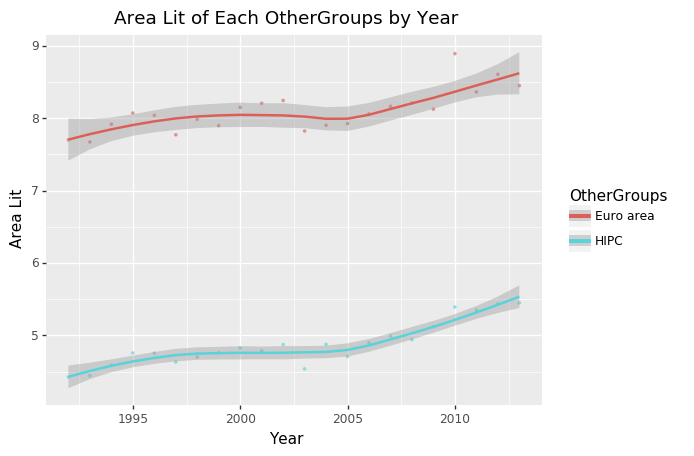

<ggplot: (-9223372029273624106)>

In [229]:
fea_trend('OtherGroups', 'Area Lit')

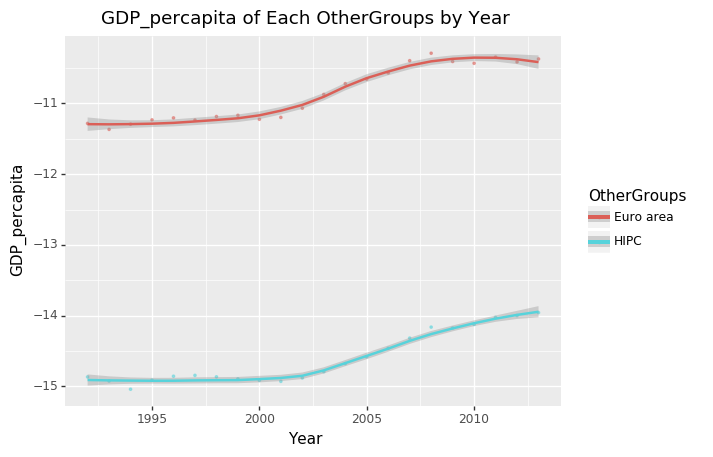

<ggplot: (7581844011)>

In [232]:
fea_trend('OtherGroups', 'GDP_percapita')

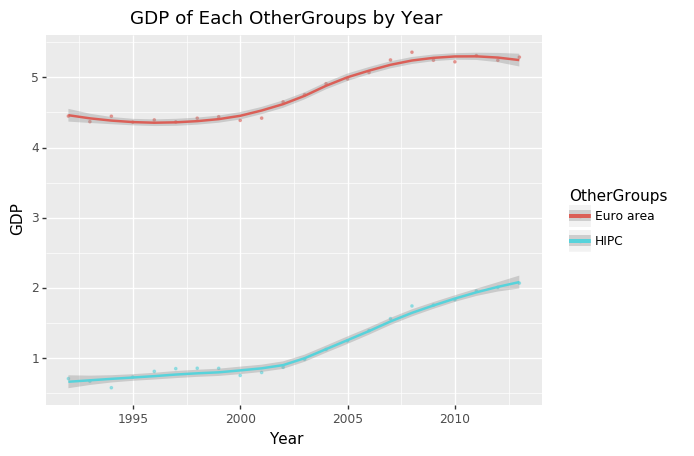

<ggplot: (-9223372029271866473)>

In [233]:
fea_trend('OtherGroups', 'GDP')

In [241]:
all_merged['OtherGroups'].isna().sum()

3186

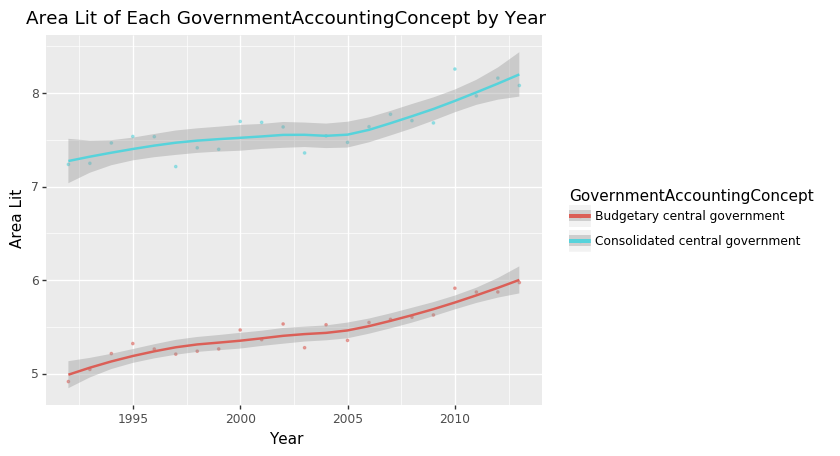

<ggplot: (7562264061)>

In [236]:
fea_trend('GovernmentAccountingConcept', 'Area Lit')

In [238]:
all_merged['GovernmentAccountingConcept'].isna().sum()

989

In [239]:
len(all_merged['GovernmentAccountingConcept'])

4460

In [290]:
all_merged['Consolidated'] = np.where(all_merged['GovernmentAccountingConcept'] == 'Budgetary central government', 'No',
              np.where(all_merged['GovernmentAccountingConcept'] == 'Consolidated central government','Yes', 'Missing'))

In [291]:
all_merged['Consolidated'].value_counts()

Yes        2041
No         1430
Missing     989
Name: Consolidated, dtype: int64

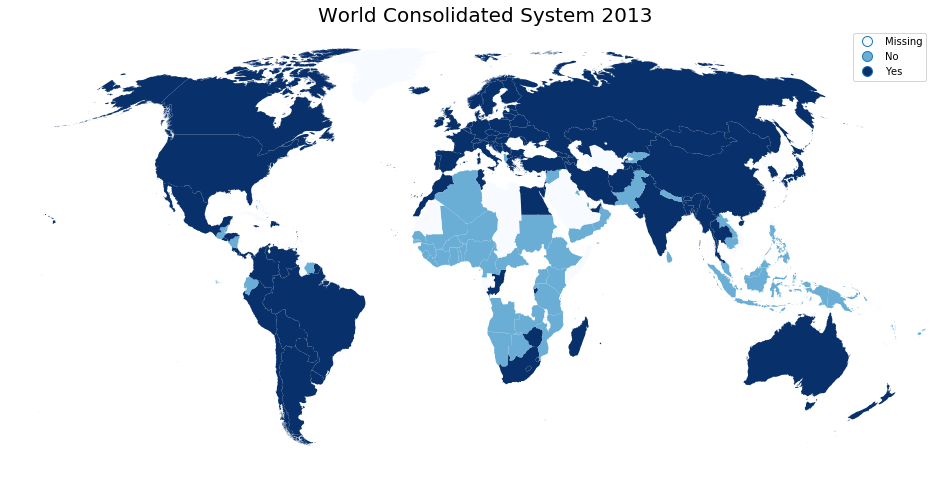

In [292]:
# Map of countries of different budgetary system in 2013 
colors = 3
cmap = 'Blues'
figsize = (16, 10)
title = 'World Consolidated System 2013'
all_merged_2013 = all_merged.loc[all_merged['Year'] == 2013]
ax = all_merged_2013.plot(column='Consolidated',cmap = cmap, categorical = True, figsize=figsize, k = colors, legend = True)
#all_merged_2013[all_merged_2013.isna().any(axis=1)].plot(ax=ax, color='#fafafa', hatch='///')
    
ax.set_title(title, fontdict={'fontsize': 20}, loc='center')
# ax.annotate(description, xy=(0.1, 0.1), size=12, xycoords='figure fraction')
ax.set_axis_off()
ax.set_xlim([-1.5e7, 1.7e7])
ax.get_legend()
#ax.get_figure()

In [278]:
all_merged.drop(columns = 'Consolidated')

ADM0_A3                                           geometry Code  \
0        IDN  (POLYGON ((11108970.26020776 445285.1302330397...  IDN   
1        IDN  (POLYGON ((11108970.26020776 445285.1302330397...  IDN   
2        IDN  (POLYGON ((11108970.26020776 445285.1302330397...  IDN   
3        IDN  (POLYGON ((11108970.26020776 445285.1302330397...  IDN   
4        IDN  (POLYGON ((11108970.26020776 445285.1302330397...  IDN   
5        IDN  (POLYGON ((11108970.26020776 445285.1302330397...  IDN   
6        IDN  (POLYGON ((11108970.26020776 445285.1302330397...  IDN   
7        IDN  (POLYGON ((11108970.26020776 445285.1302330397...  IDN   
8        IDN  (POLYGON ((11108970.26020776 445285.1302330397...  IDN   
9        IDN  (POLYGON ((11108970.26020776 445285.1302330397...  IDN   
10       IDN  (POLYGON ((11108970.26020776 445285.1302330397...  IDN   
11       IDN  (POLYGON ((11108970.26020776 445285.1302330397...  IDN   
12       IDN  (POLYGON ((11108970.26020776 445285.1302330397...  IDN   
13       IDN  (POLYGON ((11108970.26020776 445285.1302330397...  IDN   
14       IDN  (POLYGON ((11108970.26020776 445285.1302330397...  IDN   
15       IDN  (POLYGON ((11108970.26020776 445285.1302330397...  IDN   
16       IDN  (POLYGON ((11108970.26020776 445285.1302330397...  IDN   
17       IDN  (POLYGON ((11108970.26020776 445285.1302330397...  IDN   
18       IDN  (POLYGON ((11108970.26020776 445285.1302330397...  IDN   
19       IDN  (POLYGON ((11108970.26020776 445285.1302330397...  IDN   
20       IDN  (POLYGON ((11108970.26020776 445285.1302330397...  IDN   
21       IDN  (POLYGON ((11108970.26020776 445285.1302330397...  IDN   
22       MYS  (POLYGON ((11108970.26020776 445285.1302330397...  MYS   
23       MYS  (POLYGON ((11108970.26020776 445285.1302330397...  MYS   
24       MYS  (POLYGON ((11108970.26020776 445285.1302330397...  MYS   
25       MYS  (POLYGON ((11108970.26020776 445285.1302330397...  MYS   
26       MYS  (POLYGON ((11108970.26020776 445285.1302330397...  MYS   
27       MYS  (POLYGON ((11108970.26020776 445285.1302330397...  MYS   
28       MYS  (POLYGON ((11108970.26020776 445285.1302330397...  MYS   
29       MYS  (POLYGON ((11108970.26020776 445285.1302330397...  MYS   
...      ...                                                ...  ...   
4430     BHR  POLYGON ((4634135.067132483 2801514.023688715,...  BHR   
4431     BHR  POLYGON ((4634135.067132483 2801514.023688715,...  BHR   
4432     BHR  POLYGON ((4634135.067132483 2801514.023688715,...  BHR   
4433     BHR  POLYGON ((4634135.067132483 2801514.023688715,...  BHR   
4434     BHR  POLYGON ((4634135.067132483 2801514.023688715,...  BHR   
4435     BHR  POLYGON ((4634135.067132483 2801514.023688715,...  BHR   
4436     BHR  POLYGON ((4634135.067132483 2801514.023688715,...  BHR   
4437     BHR  POLYGON ((4634135.067132483 2801514.023688715,...  BHR   
4438     MAC  (POLYGON ((10497985.12523331 2370383.304715933...  MAC   
4439     MAC  (POLYGON ((10497985.12523331 2370383.304715933...  MAC   
4440     MAC  (POLYGON ((10497985.12523331 2370383.304715933...  MAC   
4441     MAC  (POLYGON ((10497985.12523331 2370383.304715933...  MAC   
4442     MAC  (POLYGON ((10497985.12523331 2370383.304715933...  MAC   
4443     MAC  (POLYGON ((10497985.12523331 2370383.304715933...  MAC   
4444     MAC  (POLYGON ((10497985.12523331 2370383.304715933...  MAC   
4445     MAC  (POLYGON ((10497985.12523331 2370383.304715933...  MAC   
4446     MAC  (POLYGON ((10497985.12523331 2370383.304715933...  MAC   
4447     MAC  (POLYGON ((10497985.12523331 2370383.304715933...  MAC   
4448     MAC  (POLYGON ((10497985.12523331 2370383.304715933...  MAC   
4449     MAC  (POLYGON ((10497985.12523331 2370383.304715933...  MAC   
4450     MAC  (POLYGON ((10497985.12523331 2370383.304715933...  MAC   
4451     MAC  (POLYGON ((10497985.12523331 2370383.304715933...  MAC   
4452     MAC  (POLYGON ((10497985.12523331 2370383.304715933...  MAC   
4453     MAC  (POLYGON ((10497985.12523331 23

In [307]:
all_merged.groupby('Continent')[['GDP', 'Area Lit']].corr()

GDP  Area Lit
Continent                                              
East Asia & Pacific        GDP       1.000000  0.902383
                           Area Lit  0.902383  1.000000
Europe & Central Asia      GDP       1.000000  0.889768
                           Area Lit  0.889768  1.000000
Latin America & Caribbean  GDP       1.000000  0.954554
                           Area Lit  0.954554  1.000000
Middle East & North Africa GDP       1.000000  0.916408
                           Area Lit  0.916408  1.000000
North America              GDP       1.000000  0.986946
                           Area Lit  0.986946  1.000000
South Asia                 GDP       1.000000  0.944609
                           Area Lit  0.944609  1.000000
Sub-Saharan Africa         GDP       1.000000  0.865215
                           Area Lit  0.865215  1.000000

In [300]:
temp_data['Year'].unique()

array([2013])

ADM0_A3                                           geometry Code  \
0        IDN  (POLYGON ((11108970.26020776 445285.1302330397...  IDN   
22       MYS  (POLYGON ((11108970.26020776 445285.1302330397...  MYS   
44       CHL  (POLYGON ((-6477059.899247097 -1872360.8384665...  CHL   
66       BOL  POLYGON ((-6477059.899247097 -1872360.83846657...  BOL   
88       PER  (POLYGON ((-6477059.899247097 -1872360.8384665...  PER   
110      ARG  (POLYGON ((-6200417.87795914 -2549111.35644869...  ARG   
132      CYP  (POLYGON ((3009012.519095719 3740778.29281707,...  CYP   
154      IND  (POLYGON ((6915098.812652987 3796247.5871544, ...  IND   
176      CHN  (POLYGON ((7073215.04104908 3570951.912669052,...  CHN   
198      ISR  POLYGON ((3093872.092717995 3338162.432765627,...  ISR   
220      LBN  POLYGON ((3150020.947226298 3539013.128993103,...  LBN   
242      ETH  POLYGON ((3205502.086201545 1011186.868897443,...  ETH   
264      SOM  POLYGON ((4380369.737195167 699282.8956443012,...  SOM   
286      KEN  (POLYGON ((3244261.642153963 494134.7424308002...  KEN   
308      PAK  (POLYGON ((6859154.734141143 3755118.397012267...  PAK   
330      MWI  (POLYGON ((3283452.042316724 -1237814.05327824...  MWI   
352      TZA  (POLYGON ((3097434.715392016 -1006193.06163079...  TZA   
374      SYR  POLYGON ((3212672.413437591 3502148.029349862,...  SYR   
396      FRA  (POLYGON ((-5110801.829416515 226125.278330580...  FRA   
418      SUR  POLYGON ((-5105956.393449659 353937.4659026176...  SUR   
440      GUY  (POLYGON ((-5334906.541559899 207659.327849886...  GUY   
462      KOR  (POLYGON ((11252435.44321181 4130015.050971423...  KOR   
484      PRK  (POLYGON ((11252435.44321181 4130015.050971423...  PRK   
506      MAR  POLYGON ((-805218.0134662403 2958425.693912848...  MAR   
528      CRI  (POLYGON ((-7859713.527832995 1168549.18819312...  CRI   
550      NIC  (POLYGON ((-8051877.471239017 1185121.40624811...  NIC   
572      COG  POLYGON ((1758470.348164863 371857.78747654, 1...  COG   
594      BTN  POLYGON ((8366159.737993468 2968904.473286193,...  BTN   
616      UKR  (POLYGON ((2564735.176756109 5543235.264616155...  UKR   
638      BLR  POLYGON ((1914447.145229846 5483372.933278301,...  BLR   
...      ...                                                ...  ...   
3800     BRB  POLYGON ((-5571204.64369694 1407528.563392056,...  BRB   
3822     LCA  POLYGON ((-5702245.71631761 1498404.43244992, ...  LCA   
3844     DMA  POLYGON ((-5737798.921084075 1625862.483130063...  DMA   
3866     ATG  (POLYGON ((-5770607.818691495 1823423.15786293...  ATG   
3888     KNA  (POLYGON ((-5835920.795690848 1839886.20524814...  KNA   
3910     VIR  (POLYGON ((-6013368.81581185 1898566.623081705...  VIR   
3932     PRI  (POLYGON ((-6316673.327542874 1937398.31245243...  PRI   
3954     JAM  POLYGON ((-7100550.316397383 1926453.364644973...  JAM   
3976     CYM  (POLYGON ((-7537295.772406007 2070039.52491089...  CYM   
3998     BMU  (POLYGON ((-5818445.880368553 3464100.89302508...  BMU   
4020     MUS  (POLYGON ((5361127.726238025 -2162862.44038181...  MUS   
4042     COM  (POLYGON ((4109018.92007059 -1316368.32339195,...  COM   
4064     STP  (POLYGON ((631230.954319068 43543.4694183557, ...  STP   
4086     CPV  (POLYGON ((-2310959.920206838 1593671.15258388...  CPV   
4108     MLT  (POLYGON ((1290939.116913295 3838398.628721217...  MLT   
4130     FRO  (POLYGON ((-495408.5652561336 6472061.74809412...  FRO   
4152     SGP  POLYGON ((9820609.980243545 148780.7458159558,...  SGP   
4174     TON  (POLYGON ((-16181406.26134152 -1985807.2039262...  TON   
4196     WSM  (POLYGON ((-16135439.640034 -1453748.48239776,...  WSM   
4218     SLB  (POLYGON ((15070122.95413757 -1255189.52341148...  SLB   
4240     TUV  (POLYGON ((16870517.02438438 -913592.667263202...  TUV   
4262     MDV  (POLYGON ((6911995.929345839 -72921.671430931,...  MDV   
4284     FSM  (POLYGON ((15378047.86749597 571218.1803337734...  FSM   
4306     VUT  (POLYGON ((15756578.14783512 -2

In [305]:
all_merged_2013.groupby('Continent')[['GDP', 'Area Lit']].corr()

GDP  Area Lit
Continent                                              
East Asia & Pacific        GDP       1.000000  0.886288
                           Area Lit  0.886288  1.000000
Europe & Central Asia      GDP       1.000000  0.937817
                           Area Lit  0.937817  1.000000
Latin America & Caribbean  GDP       1.000000  0.973518
                           Area Lit  0.973518  1.000000
Middle East & North Africa GDP       1.000000  0.925321
                           Area Lit  0.925321  1.000000
North America              GDP       1.000000  1.000000
                           Area Lit  1.000000  1.000000
South Asia                 GDP       1.000000  0.961608
                           Area Lit  0.961608  1.000000
Sub-Saharan Africa         GDP       1.000000  0.925474
                           Area Lit  0.925474  1.000000

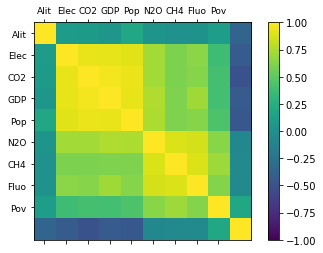

In [342]:
# Correction Matrix Plot
data_corr = data[['Area Lit', 'Electricity Consumption','CO2 Emissions','GDP','Population',
'N2O Emissions','CH4 Emissions','Fluoride Emissions','Poverty Headcount Ratio']]
names = ['Alit', 'Elec','CO2','GDP','Pop','N2O','CH4','Fluo','Pov']
correlations = data.corr()
# plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names, size = 9)
ax.set_yticklabels(names, size = 9)
plt.show()

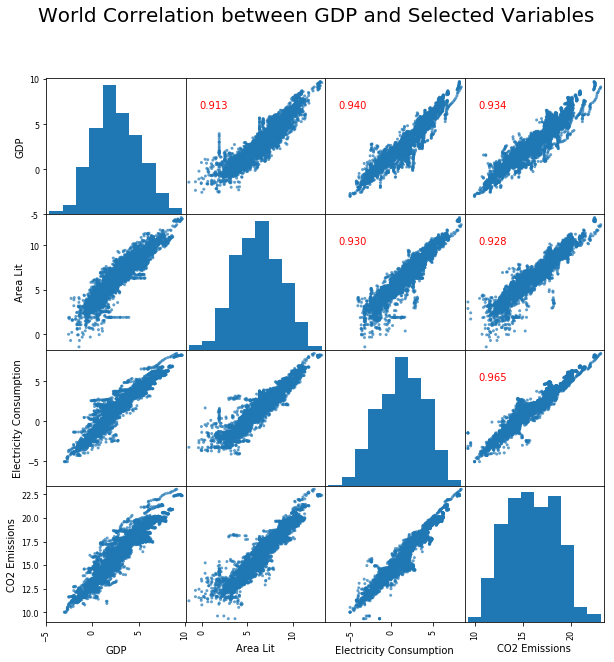

In [772]:
# scatterplot matrix
data_subcorr = data[['GDP','Area Lit', 'Electricity Consumption','CO2 Emissions']]
axes = scatter_matrix(data_subcorr, alpha = 0.7, figsize = (10, 10))
plt.suptitle(t = 'World Correlation between GDP and Selected Variables', fontsize = 20 )

corr = data_subcorr.corr().values

for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.2, 0.8), color = 'red', xycoords='axes fraction', ha='center', va='center')
plt.show()

In [387]:
# Make a dropdown to select the Continent, or "All"
area = widgets.Dropdown(
    options=['All'] + list(all_merged['Continent'].unique()),
    value='All',
    description='Continent:',
)

def plotit(area):
    all_submerged = all_merged.copy()[['GDP','Area Lit', 'Electricity Consumption','CO2 Emissions', 'Continent']]
    if area != 'All':
        all_submerged = all_submerged.loc[all_submerged['Continent'] == area]
        axes = scatter_matrix(all_submerged, alpha = 0.7, figsize = (10, 10))
        plt.suptitle(t = 'Correlation between GDP and Selected Variables in {}'.format(area), fontsize = 20 )
        corr = all_submerged.corr().as_matrix()
        for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
            axes[i, j].annotate("%.3f" %corr[i,j], (0.2, 0.8), color = 'red', xycoords='axes fraction', ha='center', va='center')
            plt.show()
            
    if area == 'All':      
        axes = scatter_matrix(all_submerged, alpha = 0.7, figsize = (10, 10))
        plt.suptitle(t = 'World Correlation between GDP and Selected Variables', fontsize = 20 )
        corr = all_submerged.corr().as_matrix()
        for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
            axes[i, j].annotate("%.3f" %corr[i,j], (0.2, 0.8), color = 'red', xycoords='axes fraction', ha='center', va='center')
            plt.show()

In [388]:
# Call the interactive plot
interactive(plotit, area=area)

interactive(children=(Dropdown(description='Continent:', options=('All', 'East Asia & Pacific', 'Latin America…

In [ ]:
axes = scatter_matrix(data_subcorr, alpha = 0.7, figsize = (10, 10))
plt.suptitle(t = 'World Correlation between GDP and Selected Variables', fontsize = 20 )


corr = data_subcorr.corr().as_matrix()

for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.2, 0.8), color = 'red', xycoords='axes fraction', ha='center', va='center')
plt.show()

In [379]:
corr

array([[1.        , 0.91256999, 0.94049886, 0.93414491],
       [0.91256999, 1.        , 0.92983853, 0.92827741],
       [0.94049886, 0.92983853, 1.        , 0.96521969],
       [0.93414491, 0.92827741, 0.96521969, 1.        ]])

Continent
East Asia & Pacific           [[AxesSubplot(0.125,0.69125;0.19375x0.18875), ...
Europe & Central Asia         [[AxesSubplot(0.125,0.69125;0.19375x0.18875), ...
Latin America & Caribbean     [[AxesSubplot(0.125,0.69125;0.19375x0.18875), ...
Middle East & North Africa    [[AxesSubplot(0.125,0.69125;0.19375x0.18875), ...
North America                 [[AxesSubplot(0.125,0.69125;0.19375x0.18875), ...
South Asia                    [[AxesSubplot(0.125,0.69125;0.19375x0.18875), ...
Sub-Saharan Africa            [[AxesSubplot(0.125,0.69125;0.19375x0.18875), ...
dtype: object

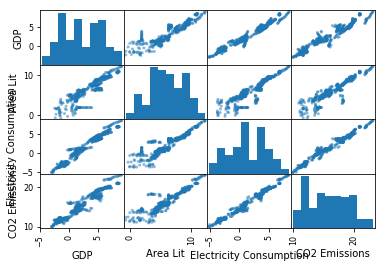

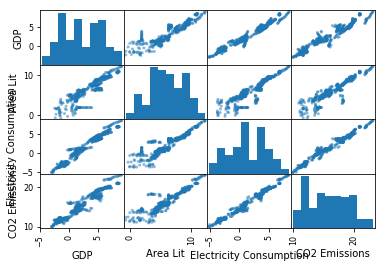

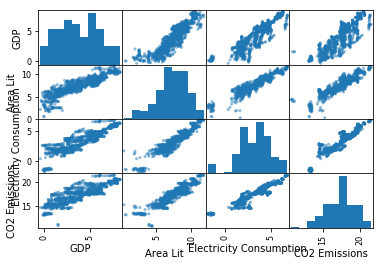

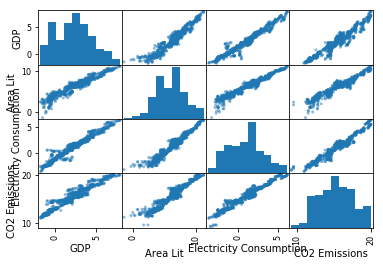

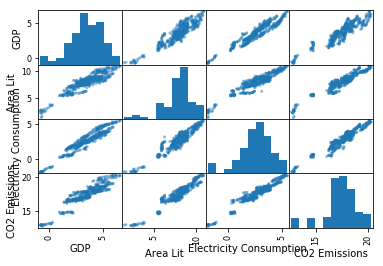

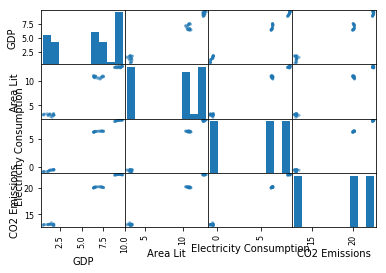

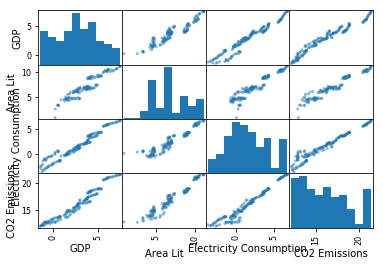

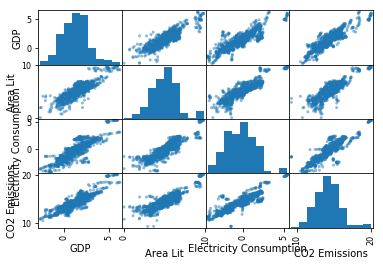

In [374]:
all_submerged = all_merged.copy()[['GDP','Area Lit', 'Electricity Consumption','CO2 Emissions', 'Continent']]
temp = all_submerged.groupby('Continent')
temp.apply(scatter_matrix)


In [477]:
# Make a dropdown to select the Continent
area = widgets.Dropdown(
    options= list(all_merged['Continent'].unique()),
    value='East Asia & Pacific',
    description='Continent:',
)

def plotit(area):
    all_submerged = all_merged.copy()[['GDP','Area Lit', 'Electricity Consumption','CO2 Emissions', 'Continent']]
    all_submerged = all_submerged.loc[all_submerged['Continent'] == area]
    axes = scatter_matrix(all_submerged, alpha = 0.7, figsize = (10, 10))
    plt.suptitle(t = 'Correlation between GDP and Selected Variables in {}'.format(area), fontsize = 20 )
    corr = all_submerged.corr().values
    for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
        axes[i, j].annotate("%.3f" %corr[i,j], (0.2, 0.8), color = 'red', xycoords='axes fraction', ha='center', va='center')
    plt.show()
            

In [478]:
interactive(plotit, area=area)

interactive(children=(Dropdown(description='Continent:', options=('East Asia & Pacific', 'Latin America & Cari…

In [398]:
# Make a dropdown to select the Continent, or "All"
area = widgets.Dropdown(
    options=['All'] + list(all_merged['Continent'].unique()),
    value='All',
    description='Continent:',
)

def plotit(area):
    all_submerged = all_merged.copy()[['GDP','Area Lit', 'Electricity Consumption','CO2 Emissions', 'Continent']]
    if area != 'All':
        all_submerged = all_submerged[all_submerged.Continent == area]
        
    axes = scatter_matrix(all_submerged, alpha = 0.7, figsize = (10, 10))
    plt.suptitle(t = 'Correlation between GDP and Selected Variables in {}'.format(area), fontsize = 20 )
    corr = all_submerged.corr().values
    for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
        axes[i, j].annotate("%.3f" %corr[i,j], (0.2, 0.8), color = 'red', xycoords='axes fraction', ha='center', va='center')
        plt.show()

In [399]:
interactive(plotit, area=area)

interactive(children=(Dropdown(description='Continent:', options=('All', 'East Asia & Pacific', 'Latin America…

In [401]:
# World Bank API 
import wbdata as wd

In [402]:
wd.get_source() 

11	Africa Development Indicators
36	Statistical Capacity Indicators
31	Country Policy and Institutional Assessment
41	Country Partnership Strategy for India (FY2013 - 17)
1 	Doing Business
30	Exporter Dynamics Database ��� Indicators at Country-Year Level
12	Education Statistics
60	Economic Fitness
13	Enterprise Surveys
28	Global Financial Inclusion
33	G20 Financial Inclusion Indicators
14	Gender Statistics
15	Global Economic Monitor
27	Global Economic Prospects
32	Global Financial Development
34	Global Partnership for Education
29	The Atlas of Social Protection: Indicators of Resilience and Equity
63	Human Capital Index
16	Health Nutrition and Population Statistics
39	Health Nutrition and Population Statistics by Wealth Quintile
40	Population estimates and projections
62	International Comparison Program (ICP) 2011
18	IDA Results Measurement System
45	Indonesia Database for Policy and Economic Research
6 	International Debt Statistics
54	Joint External Debt Hub
25	Jobs
37	LAC Equity La

In [403]:
# 1, 60, 28, 27, 15, 32, 63, 18, 2
wd.get_source(27)

27	Global Economic Prospects


In [411]:
wd.get_indicator(source = 2)

NY.ADJ.NNTY.KD           	Adjusted net national income (constant 2010 US$)
NY.ADJ.NNTY.CD           	Adjusted net national income (current US$)
NY.ADJ.NNAT.GN.ZS        	Adjusted savings: net national savings (% of GNI)
NY.ADJ.NNAT.CD           	Adjusted savings: net national savings (current US$)
NY.ADJ.ICTR.GN.ZS        	Adjusted savings: gross savings (% of GNI)
NY.ADJ.DRES.GN.ZS        	Adjusted savings: natural resources depletion (% of GNI)
NY.ADJ.DPEM.GN.ZS        	Adjusted savings: particulate emission damage (% of GNI)
NY.ADJ.DPEM.CD           	Adjusted savings: particulate emission damage (current US$)
NY.ADJ.DNGY.GN.ZS        	Adjusted savings: energy depletion (% of GNI)
NY.ADJ.DNGY.CD           	Adjusted savings: energy depletion (current US$)
NY.ADJ.DMIN.GN.ZS        	Adjusted savings: mineral depletion (% of GNI)
NY.ADJ.DMIN.CD           	Adjusted savings: mineral depletion (current US$)
NY.ADJ.DKAP.GN.ZS        	Adjusted savings: consumption of fixed capital (% of GNI)


In [413]:
df = wd.get_data('EF.EFM.RANK.XD', convert_date = False)

In [454]:
indicators = { "NY.ADJ.ICTR.GN.ZS": "saving"}
df = wbdata.get_dataframe(indicators)

In [455]:
list(df)

['saving']

In [442]:
df.shape

(15312, 1)

In [456]:
df.head()

saving
country    date           
Arab World 2017        NaN
           2016  20.813032
           2015  22.908660
           2014  32.860010
           2013  35.841243

In [447]:
df2 = df.reset_index(level = ['country', 'date'])

In [448]:
df2.shape

(15312, 3)

In [453]:
len(df2['country'].unique())

264

In [460]:
all_merged['IncomeGroup'].unique()

array(['Lower middle income', 'Upper middle income', 'High income: OECD',
       'High income: nonOECD', 'Low income'], dtype=object)

Lower middle income
plot/Lower middle income.pdf


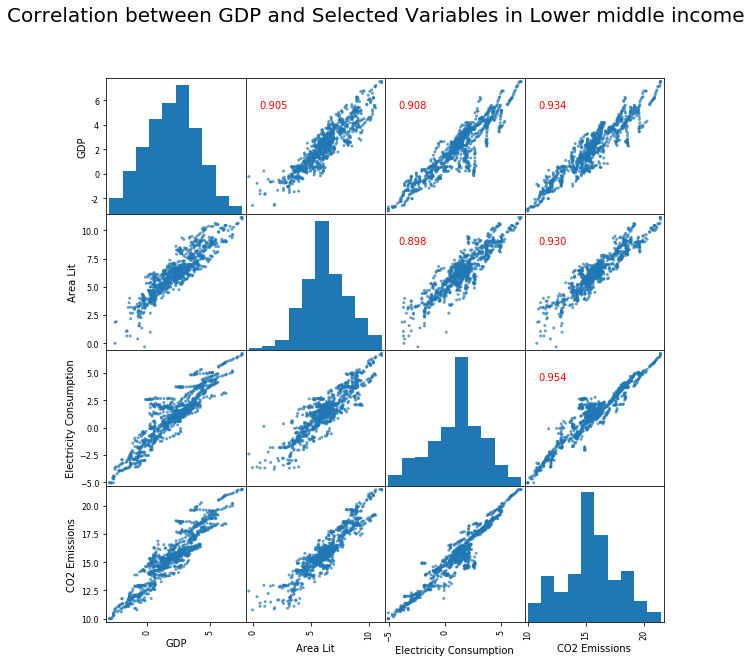

Upper middle income
plot/Upper middle income.pdf


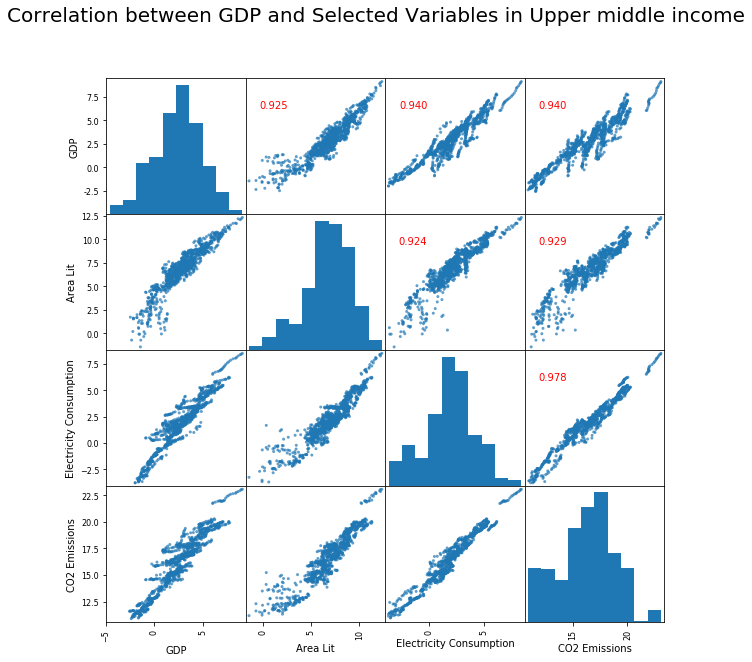

High income: OECD
plot/High income: OECD.pdf


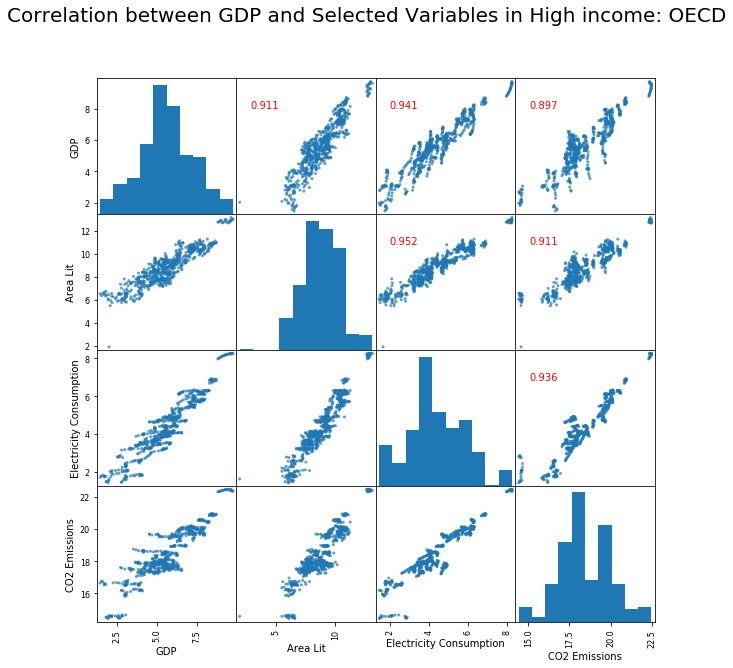

High income: nonOECD
plot/High income: nonOECD.pdf


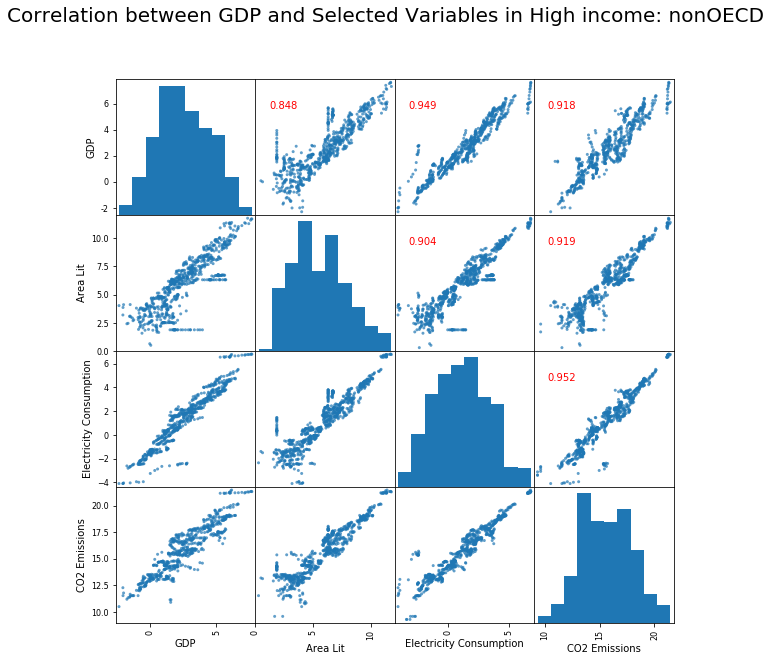

Low income
plot/Low income.pdf


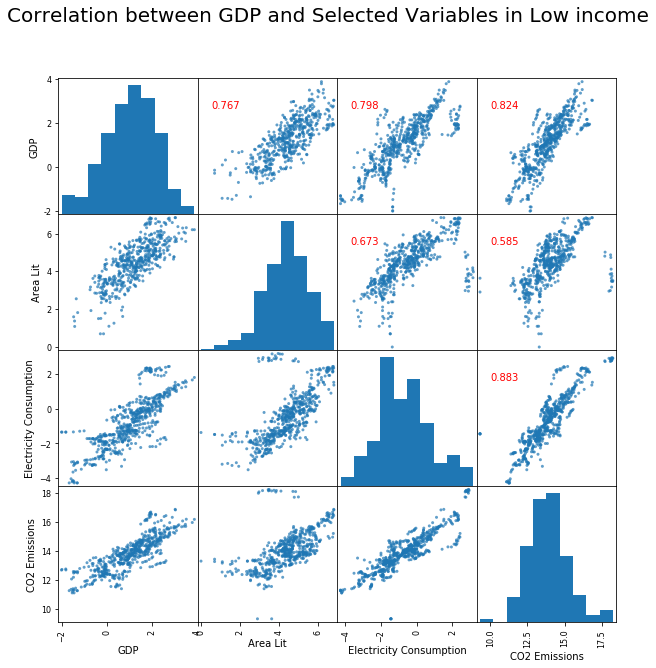

In [790]:
# save plots for different income groups

for incgroup in all_merged['IncomeGroup'].unique():
    print(incgroup)
    all_submerged = all_merged.copy()[['GDP','Area Lit', 'Electricity Consumption','CO2 Emissions', 'Continent', 'IncomeGroup']]
    all_submerged = all_submerged.loc[all_submerged['IncomeGroup'] == incgroup]
    figname = 'plot/'+ incgroup +'.pdf'
    print(figname)
    axes = scatter_matrix(all_submerged, alpha = 0.7, figsize = (10, 10))
    plt.suptitle(t = 'Correlation between GDP and Selected Variables in {}'.format(incgroup), fontsize = 20 )
    corr = all_submerged.corr().values
    for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
        axes[i, j].annotate("%.3f" %corr[i,j], (0.2, 0.8), color = 'red', xycoords='axes fraction', ha='center', va='center')
    plt.savefig(figname)
    plt.show()
    

In [484]:
interactive(plotinc, incgroup = incgroup)

interactive(children=(Dropdown(description='Income Group:', index=4, options=('Lower middle income', 'Upper mi…

In [ ]:
# Make a dropdown to select the Continent
incgroup = widgets.Dropdown(
    options= list(all_merged['IncomeGroup'].unique()),
    value='Low income',
    description='Income Group:',
)

def plotinc(incgroup):
    all_submerged = all_merged.copy()[['GDP','Area Lit', 'Electricity Consumption','CO2 Emissions', 'Continent', 'IncomeGroup']]
    all_submerged = all_submerged.loc[all_submerged['IncomeGroup'] == incgroup]
    axes = scatter_matrix(all_submerged, alpha = 0.7, figsize = (10, 10))
    plt.suptitle(t = 'Correlation between GDP and Selected Variables in {}'.format(incgroup), fontsize = 20 )
    corr = all_submerged.corr().values
    for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
        axes[i, j].annotate("%.3f" %corr[i,j], (0.2, 0.8), color = 'red', xycoords='axes fraction', ha='center', va='center')
    plt.show()

In [495]:
# Difference over time
dat = all_merged.copy()
prop_na = all_merged.isna().mean()
few_na_ind = prop_na.loc[prop_na < 0.25]
few_na_ind.index
dat = dat[few_na_ind.index]
measurement_names = ['Area Lit', 'Electricity Consumption', 
          'CO2 Emissions', 'GDP', 'Population']
dat = dat[['Code', 'Year', 'Region', 'IncomeGroup', 'Continent'] + measurement_names]
dat = dat.sort_values(by = ['Code', 'Year'])
dat.head()


dat_lag = dat.copy()
for measurement in measurement_names:
    for lag in [1, 2]:
        lag_varname = measurement + '_lag_' + str(lag)
        dat_lag[lag_varname] = dat_lag[measurement].shift(lag)
    lag1_varname = measurement + '_lag_1'
    diff_varname = measurement + '_diff'
    dat_lag[diff_varname] = dat_lag[measurement] - dat_lag[lag1_varname]
        
dat_lag = dat_lag.query('Year >= 1994')

In [499]:
list(dat_lag)

['Code',
 'Year',
 'Region',
 'IncomeGroup',
 'Continent',
 'Area Lit',
 'Electricity Consumption',
 'CO2 Emissions',
 'GDP',
 'Population',
 'Area Lit_lag_1',
 'Area Lit_lag_2',
 'Area Lit_diff',
 'Electricity Consumption_lag_1',
 'Electricity Consumption_lag_2',
 'Electricity Consumption_diff',
 'CO2 Emissions_lag_1',
 'CO2 Emissions_lag_2',
 'CO2 Emissions_diff',
 'GDP_lag_1',
 'GDP_lag_2',
 'GDP_diff',
 'Population_lag_1',
 'Population_lag_2',
 'Population_diff']

In [508]:
# Define function to select the Continent for lagged measures
 
def d_area(area):
    dat_sublag = dat_lag.copy()[['GDP_diff','Area Lit_diff', 'Electricity Consumption_diff',
                                 'CO2 Emissions_diff', 'Continent']]
    dat_sublag = dat_sublag.loc[dat_sublag['Continent'] == area]
    axes = scatter_matrix(dat_sublag, alpha = 0.7, figsize = (10, 10))
    plt.suptitle(t = 'Correlation between Lag 1 GDP and Selected Variables in {}'.format(area), fontsize = 20 )
    corr = dat_sublag.corr().values
    for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
        axes[i, j].annotate("%.3f" %corr[i,j], (0.2, 0.8), color = 'red', xycoords='axes fraction', ha='center', va='center')
    plt.show()
            

In [509]:
interactive(d_area, area = area)

interactive(children=(Dropdown(description='Continent:', index=5, options=('East Asia & Pacific', 'Latin Ameri…

In [506]:
# Define function to select the Continent for lagged measures

def d_inc(incgroup):
    dat_sublag = dat_lag.copy()[['GDP_diff','Area Lit_diff', 'Electricity Consumption_diff',
                                 'CO2 Emissions_diff', 'IncomeGroup']]
    dat_sublag = dat_sublag.loc[dat_sublag['IncomeGroup'] == incgroup]
    axes = scatter_matrix(dat_sublag, alpha = 0.7, figsize = (10, 10))
    plt.suptitle(t = 'Correlation between Lag 1 GDP and Selected Variables in {}'.format(incgroup), fontsize = 20 )
    corr = dat_sublag.corr().values
    for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
        axes[i, j].annotate("%.3f" %corr[i,j], (0.2, 0.8), color = 'red', xycoords='axes fraction', ha='center', va='center')
    plt.show()

In [507]:
interactive(d_inc, incgroup = incgroup)

interactive(children=(Dropdown(description='Income Group:', index=2, options=('Lower middle income', 'Upper mi…

In [ ]:
# save plots for different income groups using lagged measures

for incgroup in all_merged['IncomeGroup'].unique():
    dat_sublag = dat_lag.copy()[['GDP_diff','Area Lit_diff', 'Electricity Consumption_diff',
                                 'CO2 Emissions_diff', 'IncomeGroup']]
    dat_sublag = dat_sublag.loc[dat_sublag['IncomeGroup'] == incgroup]
    figname = 'plot/diff_'+ incgroup +'.pdf'
    axes = scatter_matrix(dat_sublag, alpha = 0.7, figsize = (10, 10))
    plt.suptitle(t = 'Correlation between Lag 1 GDP and Selected Variables in {}'.format(incgroup), fontsize = 20 )
    corr = dat_sublag.corr().values
    for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
        axes[i, j].annotate("%.3f" %corr[i,j], (0.2, 0.8), color = 'red', xycoords='axes fraction', ha='center', va='center')
    plt.savefig(figname)
    plt.show()    

In [632]:
# Continent correlation map
ctn_corr = dat_lag.groupby('Continent')[['Continent', 'GDP','Area Lit', 'Electricity Consumption',
                                 'CO2 Emissions']].corr()
ctn_corr.columns  = ctn_corr.columns + '_cor'
ctn_corr = ctn_corr.reset_index(level = 'Continent').loc[['GDP'], :].drop(
           columns = ['GDP_cor'])

In [633]:
ctn_corr

Continent  Area Lit_cor  Electricity Consumption_cor  \
GDP         East Asia & Pacific      0.899936                     0.980254   
GDP       Europe & Central Asia      0.890431                     0.879118   
GDP   Latin America & Caribbean      0.955589                     0.972952   
GDP  Middle East & North Africa      0.914845                     0.953986   
GDP               North America      0.988114                     0.992077   
GDP                  South Asia      0.945520                     0.970200   
GDP          Sub-Saharan Africa      0.865081                     0.860168   

     CO2 Emissions_cor  
GDP           0.968446  
GDP           0.835865  
GDP           0.959579  
GDP           0.925433  
GDP           0.992643  
GDP           0.978021  
GDP           0.899923

In [643]:
ctncorr_merged = all_merged.merge(ctn_corr, left_on='Continent', right_on='Continent')
ctncorr_merged.head()

ADM0_A3                                           geometry Code     Region  \
0     IDN  (POLYGON ((11108970.26020776 445285.1302330397...  IDN  Indonesia   
1     IDN  (POLYGON ((11108970.26020776 445285.1302330397...  IDN  Indonesia   
2     IDN  (POLYGON ((11108970.26020776 445285.1302330397...  IDN  Indonesia   
3     IDN  (POLYGON ((11108970.26020776 445285.1302330397...  IDN  Indonesia   
4     IDN  (POLYGON ((11108970.26020776 445285.1302330397...  IDN  Indonesia   

   Year  Area Lit  Electricity Consumption  CO2 Emissions       GDP  \
0  2013  9.551737                 5.211580      19.987973  6.766590   
1  2012  9.622070                 5.120900      20.211673  6.776187   
2  2011  9.322483                 5.055170      20.150537  6.740439   
3  2010  9.469328                 4.977307      19.895402  6.564125   
4  2009  8.985433                 4.893862      19.931636  6.290791   

   Population        ...         LatestTradeData  LatestWaterWithdrawalData  \
0   19.342032        ...                  2013.0                     2000.0   
1   19.329092        ...                  2013.0                     2000.0   
2   19.315986        ...                  2013.0                     2000.0   
3   19.302848        ...                  2013.0                     2000.0   
4   19.289734        ...                  2013.0                     2000.0   

   nonOECD  GDP_percapita nl_percapita Consolidated Budgetary Area Lit_cor  \
0    Other     -12.575442    -9.790295           No       Yes     0.899936   
1    Other     -12.552905    -9.707022           No       Yes     0.899936   
2    Other     -12.575547    -9.993503           No       Yes     0.899936   
3    Other     -12.738724    -9.833520           No       Yes     0.899936   
4    Other     -12.998943   -10.304301           No       Yes     0.899936   

  Electricity Consumption_cor CO2 Emissions_cor  
0                    0.980254          0.968446  
1                    0.980254          0.968446  
2                    0.980254          0.968446  
3                    0.980254          0.968446  
4                    0.980254          0.968446  

[5 rows x 47 columns]

In [644]:
vmin = min(ctncorr_merged['Area Lit_cor'].describe()['min'], 
           ctncorr_merged['Electricity Consumption_cor'].describe()['min'],
           ctncorr_merged['CO2 Emissions_cor'].describe()['min'])

vmax = max(ctncorr_merged['Area Lit_cor'].describe()['max'], 
           ctncorr_merged['Electricity Consumption_cor'].describe()['max'],
           ctncorr_merged['CO2 Emissions_cor'].describe()['max'])

print(vmin, vmax)

0.8358649838543023 0.9926428277727691


In [649]:
# Map of countries of different budgetary system in 2013 
colors = 5 
cmap = 'Blues'
figsize = (16, 10)

def corr_map(measure):
    #title = 'Correlation between GDP and {}'.format(measure)
    ctncorr_merged_2013 = ctncorr_merged.loc[ctncorr_merged['Year'] == 2013]
    ax = ctncorr_merged_2013.plot(column = measure,cmap = cmap, figsize=figsize, vmin = vmin, vmax = vmax, k = colors, legend = True)
    #all_merged_2013[all_merged_2013.isna().any(axis=1)].plot(ax=ax, color='#fafafa', hatch='///')
    
    ax.set_title(title, fontdict={'fontsize': 20}, loc='center')
    # ax.annotate(description, xy=(0.1, 0.1), size=12, xycoords='figure fraction')
    ax.set_axis_off()
    ax.set_xlim([-1.5e7, 1.7e7])
    ax.get_legend()
    #ax.get_figure()

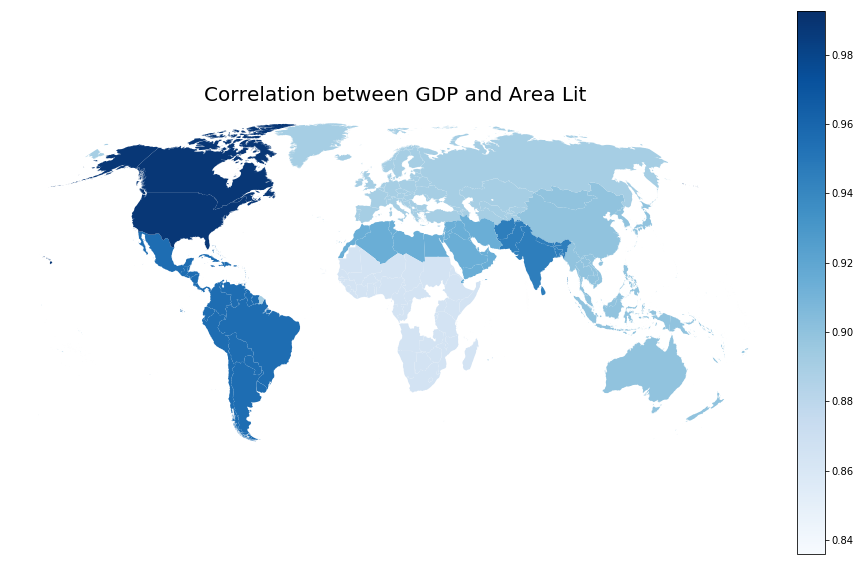

In [654]:
corr_map('Area Lit_cor')
title = 'Correlation between GDP and Area Lit'

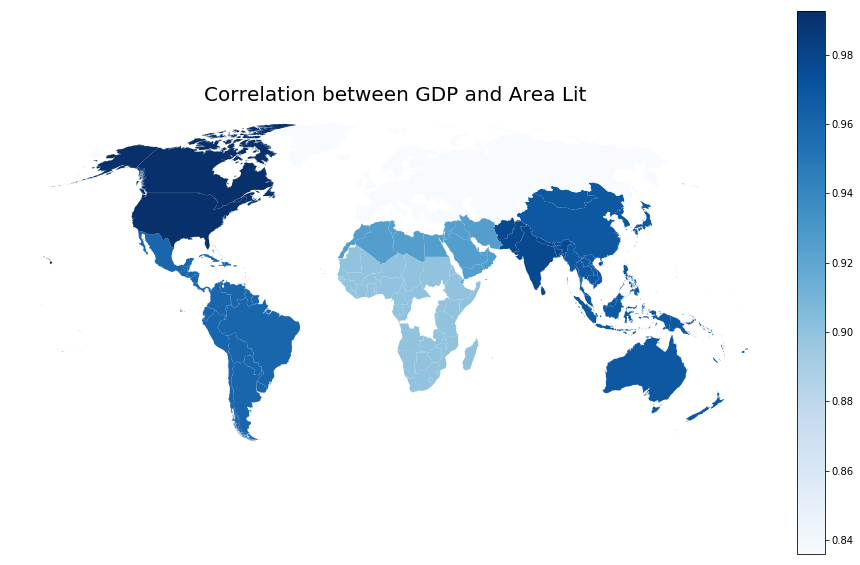

In [655]:
corr_map('CO2 Emissions_cor')
title = 'Correlation between GDP and CO2 Emissions'

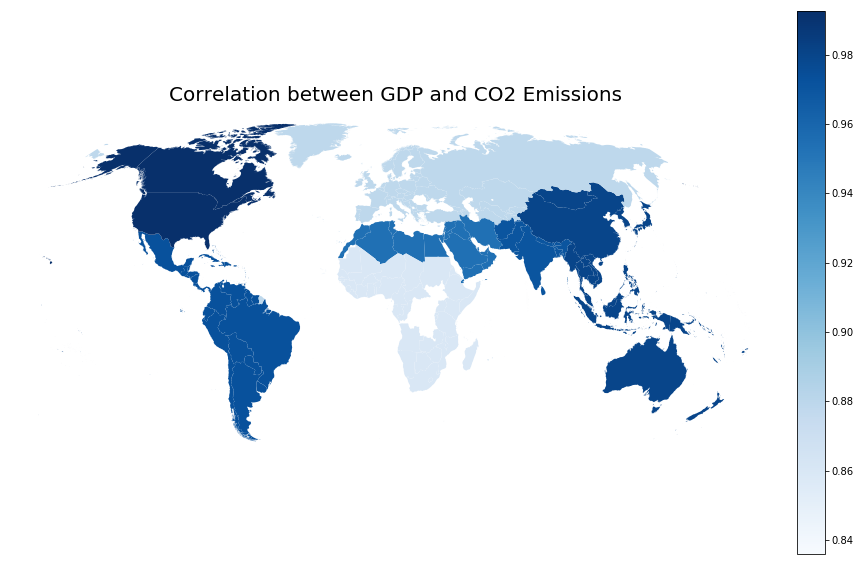

In [657]:
corr_map('Electricity Consumption_cor')
title = 'Correlation between GDP and Electricity Consumption'

In [ ]:
# Income group correlation bar chart